## Project Unsupervised Learning
By Ajay Kumar

### Problem Statement: Part One

• DOMAIN: Automobile 

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 
continuous attributes 

• DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon 
• Attribute Information: 
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance) 

In [1180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1181]:
# Importing the necesary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Import and warehouse data

In [1182]:
# Loading the Dataset using pandas command
df1 = pd.read_json('/content/drive/MyDrive/AIML PROJECT/UNSUPERVISED/Part1 - Car-Attributes.json')
print(df1.shape)
df1.head()

(398, 8)


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


The Dataset has 398 entries and 8 columns

In [1183]:
df2 = pd.read_csv('/content/drive/MyDrive/AIML PROJECT/UNSUPERVISED/Part1 - Car name.csv')
print(df2.shape)
df2.head()

(398, 1)


,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


The Dataset has 398 entries and 1 columns

In [1184]:
# concatinating df1 and df2 to make final dataframe
df = pd.concat([df2, df1], axis=1)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [1185]:
print('Final shape of the Dataset is:', df.shape )

Final shape of the Dataset is: (398, 9)


There are 398 entries and 9 columns in df i.e final dataset

## Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [1186]:
df.to_csv('Automobile.csv') # We can also alocate the path where we want to save ethe file

In [1187]:
data = pd.read_csv('/content/ Automobile.csv')
data.head()

,Unnamed: 0,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [1188]:
# Saving the final dataset to csv file
df.to_excel('Automobile.xlsx')

In [1189]:
data = pd.read_excel('/content/Automobile.xlsx')
data.head()

,Unnamed: 0,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [1190]:
# Saving the final dataset to jason file formate
df.to_json('Automobile.json')

In [1191]:
data = pd.read_json('/content/Automobile.json')
data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


The Dataset has saved in all the formate and heads of the dataset are shown above

## 2. Data cleansing

In [1192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


The 'hp' variable data types is object but it contains the float data which needs to be imputed

In [1193]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [1194]:
# Checking the null values
df.isnull().sum().any()

False

There are no null values in the Dataset

In [1195]:
# Checking the duplicates of the dataset
df.duplicated().sum()

0

There are no duplicate values in the Dataset

In [1196]:
# Checking the unique vakue of each variables using for loop
for feature in df.columns[1:]:
  print(feature, 'Number of levels', df[feature].nunique())
  print(df[feature].unique())
  print('\n')

mpg Number of levels 129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


cyl Number of levels 5
[8 4 6 3 5]


disp Number of levels 82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155

By using the unique command we found that there are some noisy data i.e (?) in hp variable. Imputing the same by Nan and then after replacing it by mean or median.

In [1197]:
df[df['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


There are total 6 entries filled with ? mark in hp variables. Imputing all by Nan first and then by mean or median

In [1198]:
df['hp'] = df['hp'].replace('?', np.nan)
df['hp'] = df['hp'].fillna(df['hp'].median())

In [1199]:
df[df['hp'] == '?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [1200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


# 3. Data analysis & visualisation

In [1201]:
# Droping the feature car_name
df = df.drop('car_name', axis=1)

## Univariate Analysis

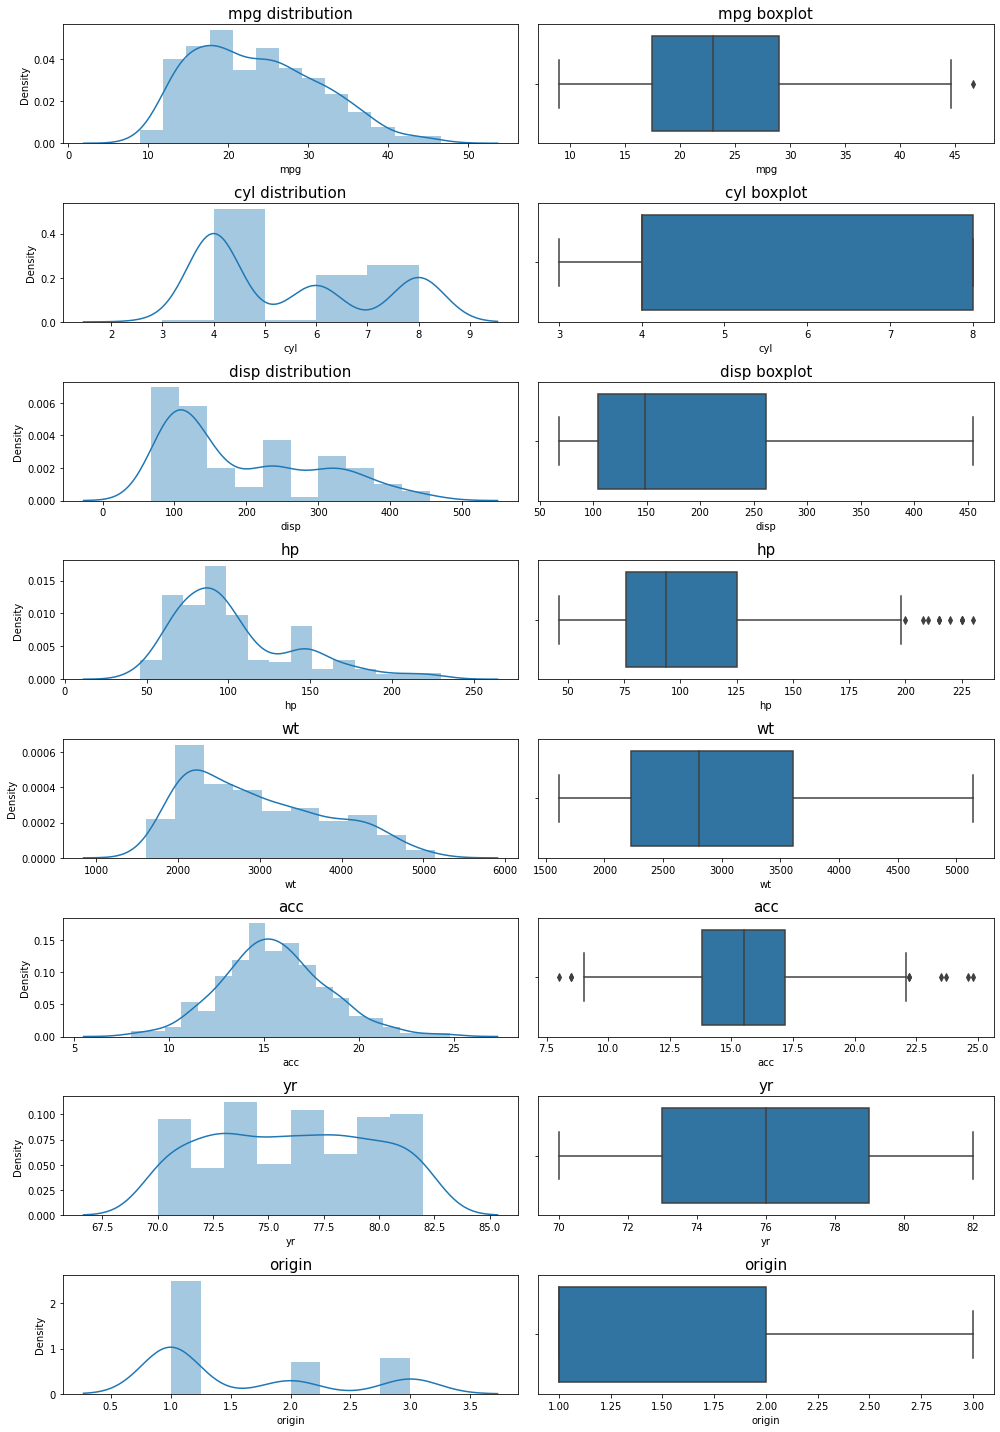

In [1202]:
fig, axes = plt.subplots(nrows=8, ncols=2)
fig.set_size_inches(14,20)
a = sns.distplot(df['mpg'], ax=axes[0][0]);
a.set_title('mpg distribution', fontsize=15)

a = sns.boxplot(df['mpg'], ax=axes[0][1]);
a.set_title('mpg boxplot', fontsize=15)

a = sns.distplot(df['cyl'], ax=axes[1][0]);
a.set_title('cyl distribution', fontsize=15)


a = sns.boxplot(df['cyl'], ax=axes[1][1]);
a.set_title('cyl boxplot', fontsize=15)

a = sns.distplot(df['disp'], ax=axes[2][0]);
a.set_title('disp distribution', fontsize=15)

a = sns.boxplot(df['disp'], ax=axes[2][1]);
a.set_title('disp boxplot', fontsize=15)

a = sns.distplot(df['hp'], ax=axes[3][0]);
a.set_title('hp', fontsize=15)

a = sns.boxplot(df['hp'], ax=axes[3][1]);
a.set_title('hp', fontsize=15)


a = sns.distplot(df['wt'], ax=axes[4][0]);
a.set_title('wt', fontsize=15)

a = sns.boxplot(df['wt'], ax=axes[4][1]);
a.set_title('wt', fontsize=15)

a = sns.distplot(df['acc'], ax=axes[5][0]);
a.set_title('acc', fontsize=15)

a = sns.boxplot(df['acc'], ax=axes[5][1]);
a.set_title('acc', fontsize=15)

a = sns.distplot(df['yr'], ax=axes[6][0]);
a.set_title('yr', fontsize=15)

a = sns.boxplot(df['yr'], ax=axes[6][1]);
a.set_title('yr', fontsize=15)

a = sns.distplot(df['origin'], ax=axes[7][0]);
a.set_title('origin', fontsize=15)

a = sns.boxplot(df['origin'], ax=axes[7][1]);
a.set_title('origin', fontsize=15)

plt.tight_layout()
plt.show()


*mpg: Slightly right skewed and there is one upper outlier

*displacement: Right skewed

*horsepower: Slightly right skewed and there is some upper ourliers

*weight: The data distributed in a rigth skewed manner

*acceleration: The data is normally distributed and there is some lower and upper outliers

## Bivariate analysis

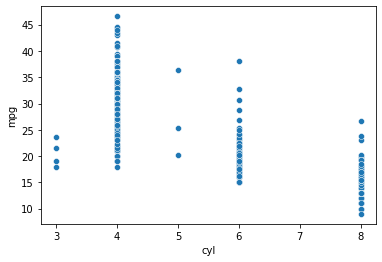

In [1203]:
sns.scatterplot(x= 'cyl', y='mpg', data=df);

The above image indicates that as the number of cylinder is increasing the mpg is dereasing i.e there is a negetive co-relation between them. 

More no of cylinders indicates its a heavy vehicle and vice-versa

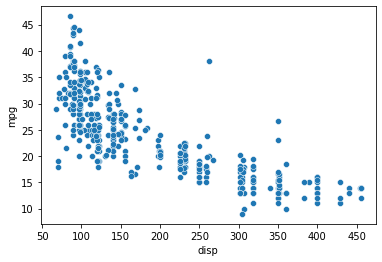

In [1204]:
sns.scatterplot(x= 'disp', y='mpg', data=df);

The above image indicates that as the displacement is increasing the mpg is dereasing i.e there is a negetive co-relation between them

Lower displacement means less no. of cylinders and more mpg.As displacement will increase the no. of cylinder will also increase and mpg will reduce.

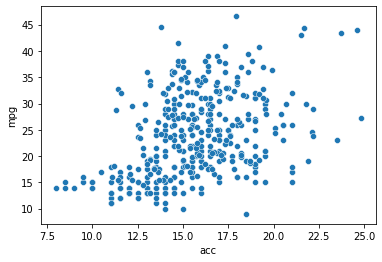

In [1205]:
sns.scatterplot(x= 'acc', y='mpg', data=df);

The above image indicates that there is some co-relation between them but acceleration look poor predictor for mpg

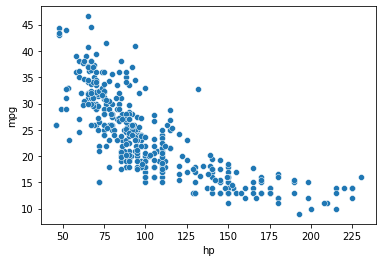

In [1206]:
sns.scatterplot(x= 'hp', y='mpg', data=df);

Horsepower and mpg are strongly -ve co-related to each other and horsepower looks good predictor for mpg.

The higher value of horsepower is mostly associated with heavy vehicle which will cause for reduction in mpg and vice-versa

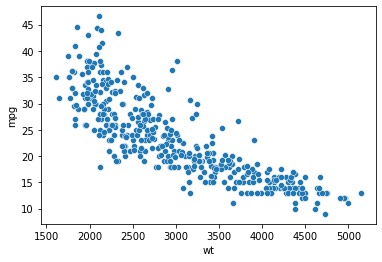

In [1207]:
sns.scatterplot(x= 'wt', y='mpg', data=df);

Weight and mpg are -ve co-related to each other i.e if weight is increasing the mpg will decrease. Very good predictor for mpg

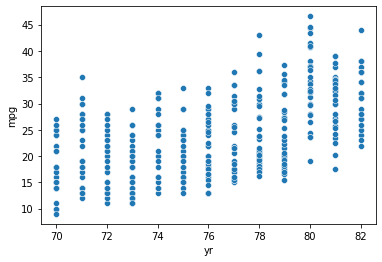

In [1208]:
sns.scatterplot(x= 'yr', y='mpg', data=df);

The mpg and year are positively co-related to each other. The vechile will have higher mpg if it is newly manufactured

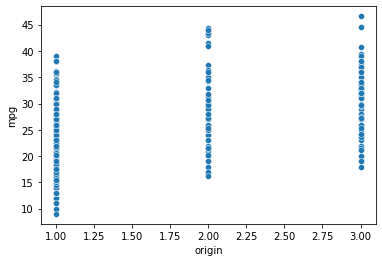

In [1209]:
sns.scatterplot(x= 'origin', y='mpg', data=df);

The vehicle manufactured in origin 3 has higher mpg as compare to other origin

## Multivariate Analysis

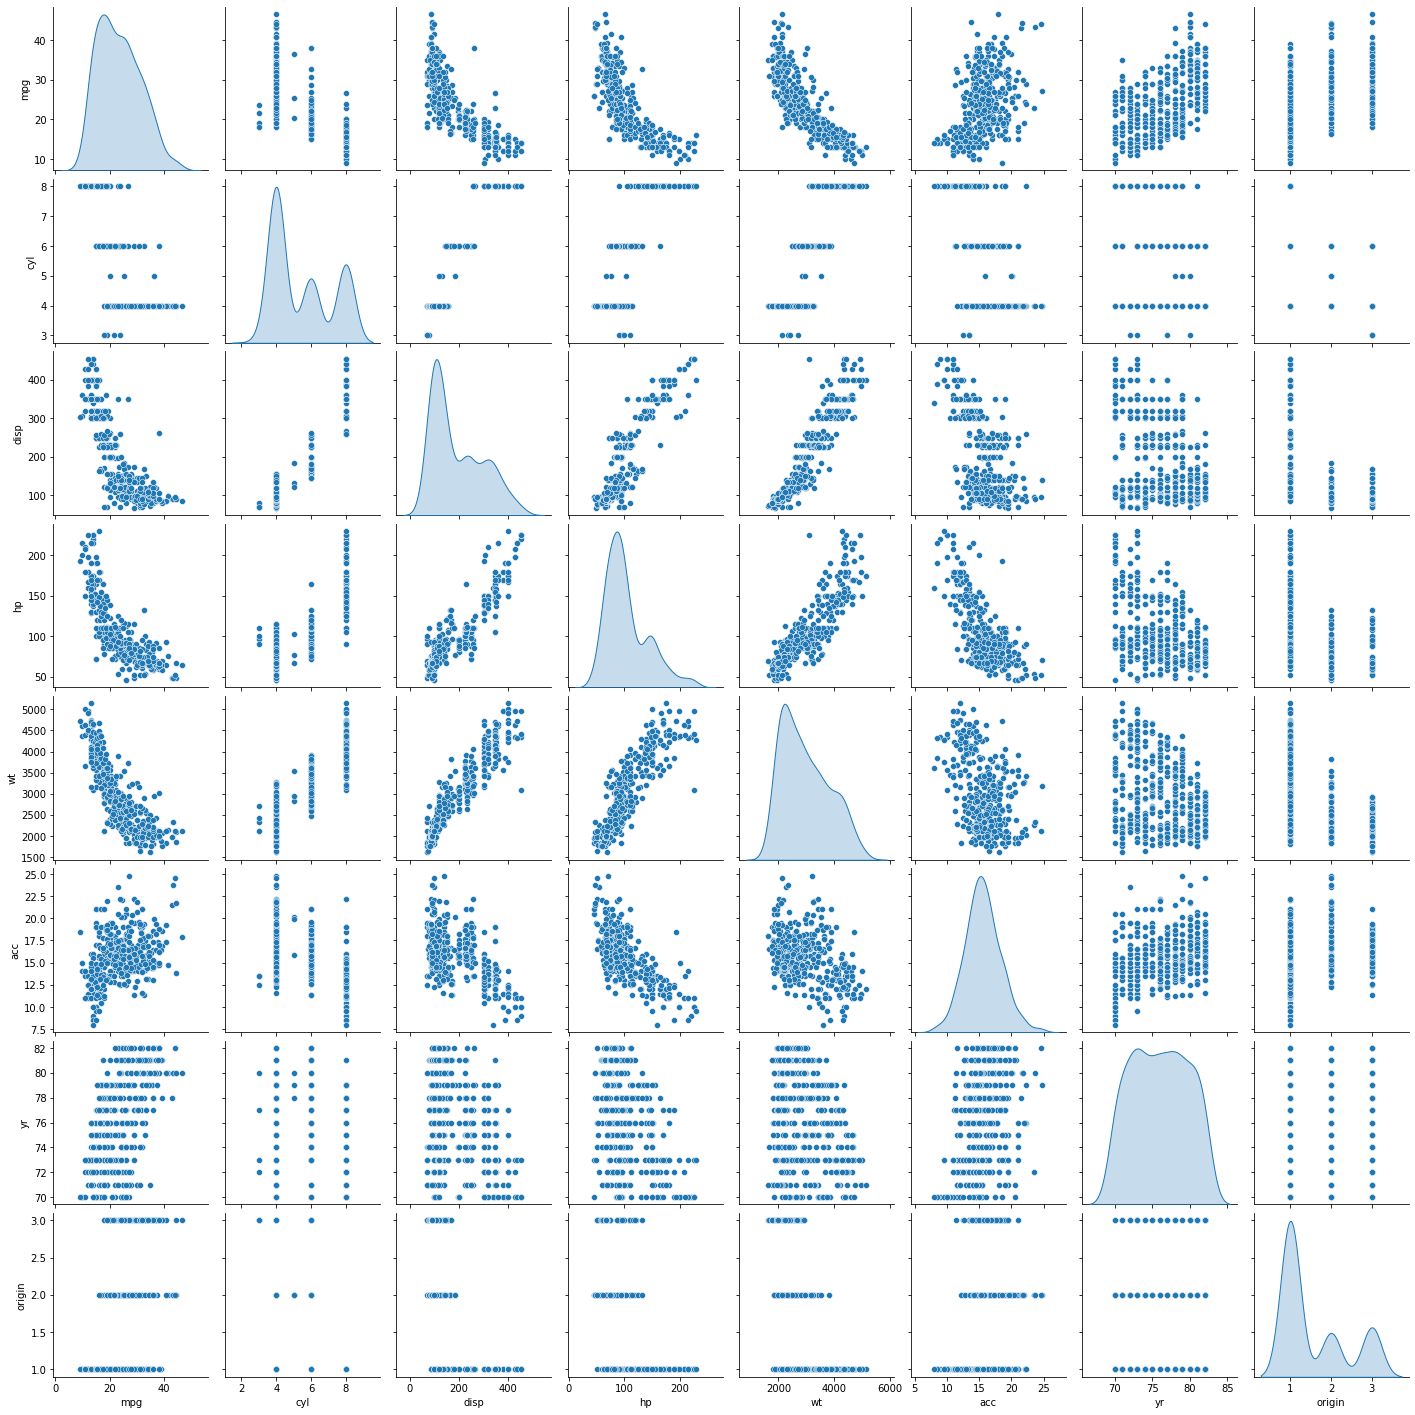

In [1210]:
sns.pairplot(df, diag_kind='kde');

The pairplot of the dataset indicates that the features are +ve and -ve co-related to each other i.e there is multi co-linearity in the dataset

Variables:
  mpg: Traget variable which looks normally distributed.

  Displacement, horsepower and weight are right skewed.

  Manufacturing year normally distributed

## Corelation Heatmap

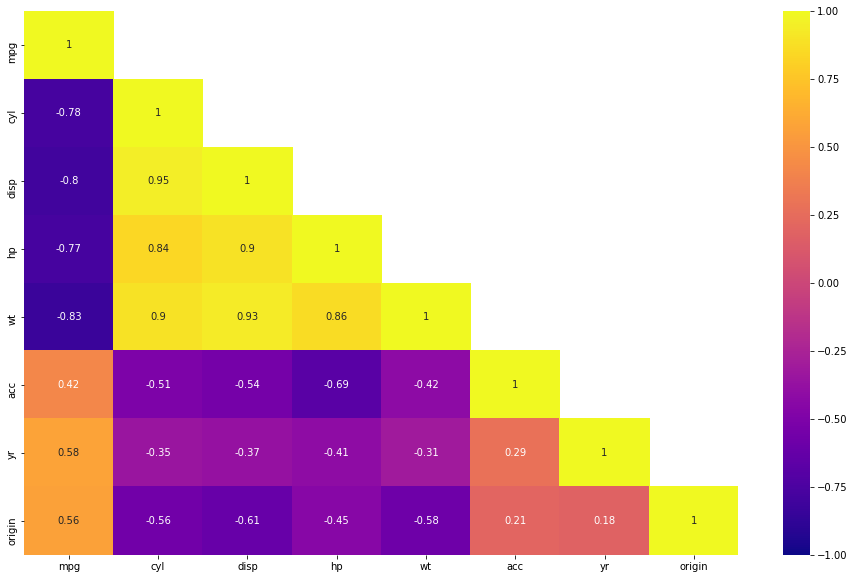

In [1211]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='plasma', vmax=1, vmin=-1, mask=np.triu(df.corr(),+1));

The corelation heatmap indicates that the features are highly co-related to each other. Both +ve and +ve

## Checking for outliers

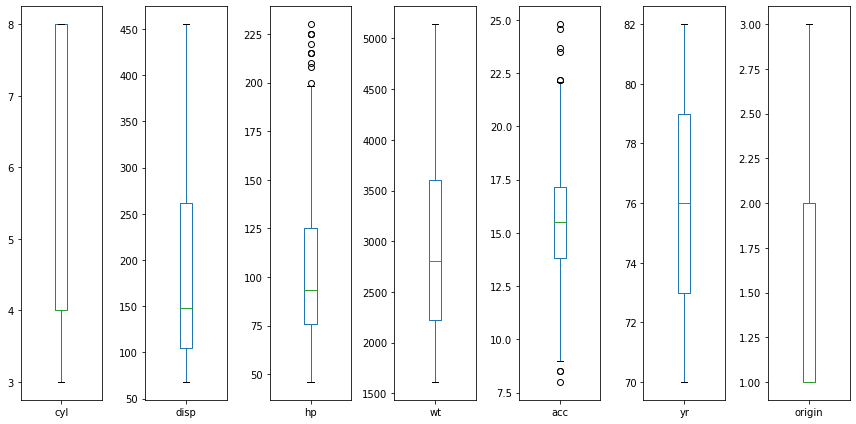

In [1212]:
# Checking for outliers using IQR methods
df.iloc[:,1:].plot(kind='box', subplots = True, figsize = (12,6))
plt.tight_layout()
plt.show()

In [1213]:
# Imputing the outliers using IQR methods
def out_limit(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range, upper_range


In [1214]:
for col in df.columns[1:]:
  lr, ur = out_limit(df[col])
  df[col] = np.where(df[col] < lr, lr, df[col])
  df[col] = np.where(df[col] > ur, ur, df[col])

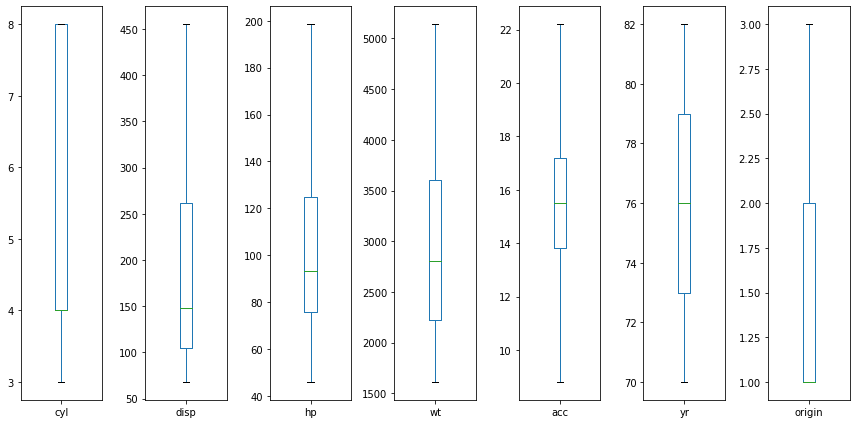

In [1215]:
# Checking for outliers
df.iloc[:,1:].plot(kind='box', subplots = True, figsize = (12,6))
plt.tight_layout()
plt.show()

The outliers are removed using IQR methods

# 4. Machine learning

### Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 

In [1216]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1217]:
kmeans_df = df.copy(deep=True)

In [1218]:
x = scaler.fit_transform(kmeans_df)
x

array([[-0.7064387 ,  1.49819126,  1.0906037 , ..., -1.32059529,
        -1.62742629, -0.71514478],
       [-1.09075062,  1.49819126,  1.5035143 , ..., -1.50648937,
        -1.62742629, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.19623199, ..., -1.69238346,
        -1.62742629, -0.71514478],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -1.46931056,
         1.62198339, -0.71514478],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  1.13320659,
         1.62198339, -0.71514478],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  1.43063712,
         1.62198339, -0.71514478]])

## K Means

In [1219]:
wcss =[]
for i in range(1,10):
  kmeans = KMeans(n_clusters= i, random_state=1, max_iter=500)
  kmeans.fit(x)
   # inertia method returns wcss for that model
  wcss.append(kmeans.inertia_)

In [1220]:
wcss

[3183.9999999999995,
 1581.3340489733669,
 1177.8951803955374,
 976.4896688652216,
 818.3732941383653,
 739.1945075401402,
 671.3843307288724,
 627.1176599104697,
 586.9930397768765]

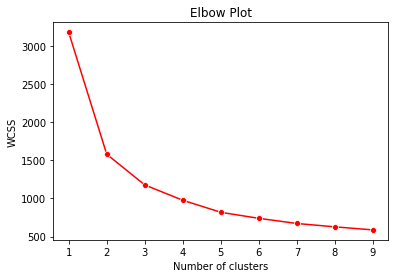

In [1221]:
# Elbow Method to find optimal number of clusters
sns.lineplot(range(1,10), wcss, marker='o', color='red')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The above elbow method is giving a indication of 3 cluster but I will procceed for silhouette score to find the no. of clusters

In [1222]:
from sklearn.metrics import silhouette_score
ss = {1:0}
for i in range (2,10):
  cluster = KMeans(n_clusters=i, random_state=1)
  y = cluster.fit_predict(x)
  s = silhouette_score(x, y, random_state=1)
  ss[i] = round(s,5)
  print('The Average Silhouette score for {} cluster is {}'.format(i, round(s,5)))

The Average Silhouette score for 2 cluster is 0.4157
The Average Silhouette score for 3 cluster is 0.32746
The Average Silhouette score for 4 cluster is 0.31512
The Average Silhouette score for 5 cluster is 0.33581
The Average Silhouette score for 6 cluster is 0.34044
The Average Silhouette score for 7 cluster is 0.29462
The Average Silhouette score for 8 cluster is 0.27732
The Average Silhouette score for 9 cluster is 0.26898


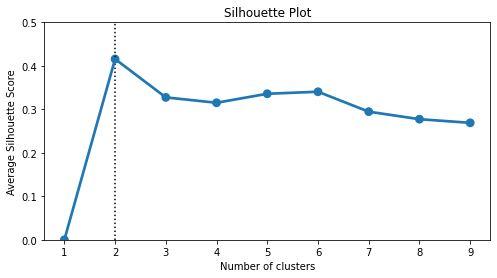

In [1223]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(8,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0.5,ymin=0,linestyles='dotted')
ax.set(ylim=(0, 0.50))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette Score')
plt.show()

It is clear from above Figure that the maximum value of average silhouette score is achieved for k = 2 but I will take no. of cluster equal to 3 because I wanted to devide them in Low, Medium and High mpg vehicle.

In [1224]:
# Taking 3 clusters
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(x)
labels = k_means.labels_

In [1225]:

kmeans_df['clusters'] = labels

In [1226]:
kmeans_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0


In [1227]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [1228]:
silhouette_score(x, labels)

0.3274608758112208

In [1229]:
sil_width = silhouette_samples(x, labels)

In [1230]:
kmeans_df['sil_width'] = sil_width

In [1231]:
kmeans_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters,sil_width
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0,0.439453
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0,0.590469
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0,0.504068
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0,0.504593
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0,0.474825


In [1232]:
kmeans_df = pd.concat([df2, kmeans_df], axis=1)
kmeans_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters,sil_width
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0,0.439453
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0,0.590469
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0,0.504068
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0,0.504593
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0,0.474825


## Cluster profiles for the clusters defined

In [1233]:
kmeans_df['clusters'].value_counts().sort_values(ascending=False)

2    161
1    137
0    100
Name: clusters, dtype: int64

In [1234]:
clust_profile=kmeans_df.groupby('clusters').mean()
clust_profile

,mpg,cyl,disp,hp,wt,acc,yr,origin,sil_width
clusters,,,,,,,,,
0,14.71500,7.980000,346.370000,158.505000,4126.910000,12.735000,73.750000,1.000000,0.532778
1,21.69562,5.240876,187.558394,94.897810,2990.861314,16.772263,76.313869,1.087591,0.276181
2,30.52795,4.068323,103.422360,77.372671,2234.720497,16.263354,77.155280,2.341615,0.243570


- Cluster 0: Heavy vehicle - In this cluster the 'mpg' of the vehicle is low bacause the vehicles have more no. of cylinders and more horsepower. More no. of cylinders are cause in large displacement. The heavy vehicles are generally more in weight also. Acceleration, year and origin are not good predictor for mpg. For example - All heavy duty vehicles such as Bus and Trucks

- Cluster 1: Medium vehicle - In this cluster the 'mpg' of the vehicle is Medium bacause the medium no. of cylinders, displacement, horsepower and weight.
For example - All medium duty vehicles such as Ambulance and mini bus

- Cluster 2: Light vehicle - In this cluster the 'mpg' of the vehicle is high bacause the less no. of cylinders and low displacement, horsepower and weight are also low in this category of vehicles.
For example - Cars and SUVs


## Hierarchical clustering

In [1235]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [1236]:
hier = df.copy()
hier.shape

(398, 8)

In [1237]:
scaled_df = scaler.fit_transform(hier)
h = pd.DataFrame(scaled_df, columns=hier.columns)
h.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.713692,0.630870,-1.320595,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.666741,0.854333,-1.506489,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.258291,0.550470,-1.692383,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.258291,0.546923,-1.320595,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.985992,0.565841,-1.878278,-1.627426,-0.715145


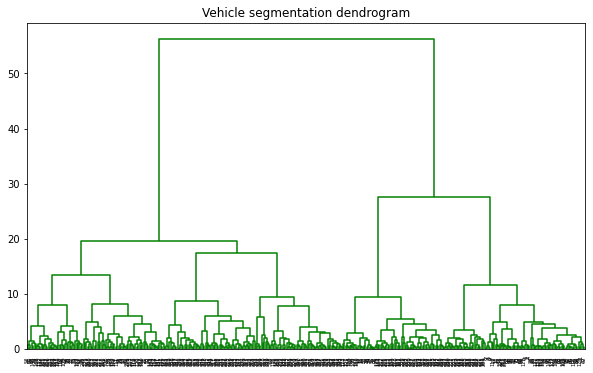

In [1238]:
plt.figure(figsize=(10,6))
plt.title('Vehicle segmentation dendrogram')
z = sch.dendrogram(sch.linkage(h, method='ward', metric='euclidean'), color_threshold=85.25)
plt.show()

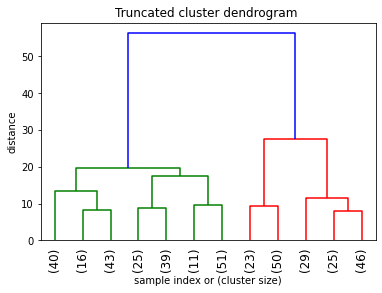

In [1239]:
Y = sch.linkage(h, method = "ward", metric='euclidean')
plt.title('Truncated cluster dendrogram ')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
sch.dendrogram(Y,truncate_mode='lastp', p=12, leaf_rotation=90,leaf_font_size=12)
plt.show()

Conclusion:
1.After drawing the Horizontal line considering the lowest height where three groups are joining in the above dendogram. I will take clusters 3

In [1240]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_no = cluster.fit_predict(h)
print(cluster_no)
df['cluster'] = cluster_no

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 0 0 0 0 2 1 1 1 1 0 0 0 0 2 2 2 2
 2 1 1 1 1 1 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 2 0 0 0
 0 0 2 0 1 1 0 0 0 0 1 0 0 1 2 2 2 2 0 0 0 0 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 1 1 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1
 2 1 1 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 0 2 2 2
 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 1 1 1 1 1 1 1 1 0 0 0
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0]


In [1241]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,1


In [1242]:
df['cluster'].value_counts().sort_values(ascending=False)

0    225
1    100
2     73
Name: cluster, dtype: int64

In [1243]:
clust_profile1= df.groupby('cluster').mean()
clust_profile1

,mpg,cyl,disp,hp,wt,acc,yr,origin
cluster,,,,,,,,
0,28.798222,4.120000,113.260000,81.171111,2362.751111,16.393778,77.173333,2.013333
1,14.684000,7.980000,345.470000,158.355000,4121.560000,12.716000,73.740000,1.000000
2,19.326027,6.109589,232.232877,98.760274,3266.493151,16.842466,75.534247,1.000000


- Cluster 1(Heavy vehicle): Low 'mpg' bacause more no. of cylinders and high displacement, horsepower and weight.

- Cluster 2(Medium vehicle): Medium 'mpg' medium because no. of cylinders medium and medium displacement, horsepower and weight.

- Cluster 0(Light vehicle): High 'mpg' high bacause less no. of cylinders and low displacement, horsepower and weight.

## Share your insights about the difference in using these two methods. 

Selecting the optimal number of clusters in the data is depend on the problem statement and Business requirments

KMeans clustering is used to find the optimal no. of cluster in large Dataset and mostly used in Industry

Hierarchical clustering is used to find the optimal no. of cluster in small Dataset.

## 5. Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]

### Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

Answers: The optimal no. of cluster can be obtained is 3 from the Dataset:

(a) In Kmeans clustering the maximum fall in wcss can be seen by using Elbow method

(b) In Hierarchical clustering the reason for selecting optimal no. of cluster is 3 by using dendrogram

## Use linear regression model on different clusters separately and print the coefficients of the models individually

In [1244]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [1245]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,1


In [1246]:
# Creating a Dataframe for each cluster
cluster_0 = df[df['cluster']==0]
cluster_1 = df[df['cluster']==1]
cluster_2 = df[df['cluster']==2]

In [1247]:
cluster_0.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
14,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,3.0,0
18,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,3.0,0
19,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,2.0,0
20,25.0,4.0,110.0,87.0,2672.0,17.5,70.0,2.0,0
21,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,0


In [1248]:
# Creating Linear Model for cluster zero(0)
X0 = cluster_0.drop({'mpg','origin','cluster'}, axis=1)
y0 = cluster_0.pop('mpg')
# invoke the LinearRegression function and find the bestfit model on training data

regression_model0 = LinearRegression()
regression_model0.fit(X0, y0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1249]:
# Coefficient of the model
coef_0 = pd.DataFrame(regression_model0.coef_, columns=['coefficient0'], index=X0.columns)
coef_0

,coefficient0
cyl,1.456410
disp,-0.009367
hp,-0.094522
wt,-0.007086
acc,0.010972
yr,0.897039


In cluster zero(0) the no. of cylinders and the manufaturing year is the most important atributes for predicting the mpg.

In [1250]:
# Let us check the intercept for the model
intercept = regression_model0.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -21.132851475625213


In [1251]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
score_cluster0 = regression_model0.score(X0,y0)
score_cluster0

0.6908005949118476

In [1252]:
y_predict0 = regression_model0.predict(X0)

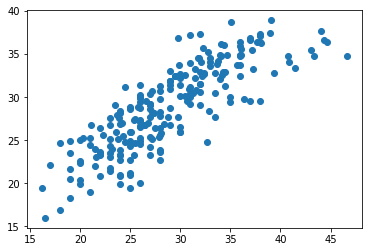

In [1253]:
plt.scatter(y0, y_predict0);

The above scatter plot shows the linear relationship between actual and predicted mpg.

In [1254]:
# Regression Model for cluster_1
cluster_1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,1


In [1255]:
# Creating the Model for cluster 1
X1 = cluster_1.drop({'mpg','origin','cluster'}, axis=1)
y1 = cluster_1.pop('mpg')
# invoke the LinearRegression function and find the bestfit model on training data

regression_model1 = LinearRegression()
regression_model1.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1256]:
coef_1 = pd.DataFrame(regression_model1 .coef_, columns=['coefficient1'], index=X1.columns)
coef_1

,coefficient1
cyl,-0.239880
disp,-0.004564
hp,-0.029585
wt,-0.001305
acc,-0.480253
yr,0.389787


In cluster 1 the no. of cylinders and the manufaturing year is the most important atributes for predicting the mpg.

In [1257]:
score_cluster1 = regression_model1.score(X1, y1)
score_cluster1

0.6262745231207398

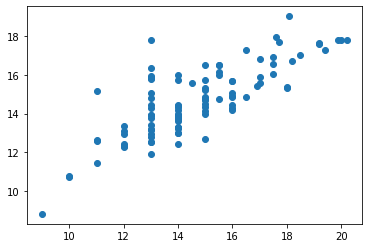

In [1258]:
y_predict1 = regression_model1.predict(X1)
plt.scatter(y1, y_predict1)

In [1259]:
cluster_2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
15,22.0,6.0,198.0,95.0,2833.0,15.5,70.0,1.0,2
16,18.0,6.0,199.0,97.0,2774.0,15.5,70.0,1.0,2
17,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,1.0,2
24,21.0,6.0,199.0,90.0,2648.0,15.0,70.0,1.0,2
33,19.0,6.0,232.0,100.0,2634.0,13.0,71.0,1.0,2


In [1260]:
# Creating the Model for cluster 1
X2 = cluster_2.drop({'mpg','origin','cluster'}, axis=1)
y2 = cluster_2.pop('mpg')
# invoke the LinearRegression function and find the bestfit model on training data

regression_model2 = LinearRegression()
regression_model2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1261]:
score_cluster2 = regression_model2.score(X2, y2)
score_cluster2

0.5299495191139126

In [1262]:
coef_2 = pd.DataFrame(regression_model2.coef_, columns=['coefficient2'], index=X2.columns)
coef_2

,coefficient2
cyl,2.644073
disp,-0.011959
hp,0.012267
wt,-0.003256
acc,-0.215379
yr,0.367696


In cluster 2 no. of cylinders are most important atributes for predicting the mpg.

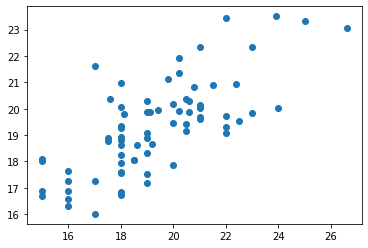

In [1263]:
y_predict2 = regression_model2.predict(X2)
plt.scatter(y2, y_predict2)

In [1264]:
# Regression Model on main dataframe
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,1


In [1265]:
# Subseting the Independent and Dependent Variable
X = df.drop({'mpg','origin','cluster'}, axis=1)
y = df.pop('mpg')

In [1266]:
X.head()

,cyl,disp,hp,wt,acc,yr
0,8.0,307.0,130.0,3504.0,12.0,70.0
1,8.0,350.0,165.0,3693.0,11.5,70.0
2,8.0,318.0,150.0,3436.0,11.0,70.0
3,8.0,304.0,150.0,3433.0,12.0,70.0
4,8.0,302.0,140.0,3449.0,10.5,70.0


In [1267]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1268]:
# Coefficient of the model
coef = pd.DataFrame(regression_model.coef_, columns=['coefficient'], index=X.columns)
coef

,coefficient
cyl,-0.262184
disp,0.007245
hp,-0.009002
wt,-0.006669
acc,0.016920
yr,0.749342


In [1269]:
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -12.931965606531811


In [1270]:
# Accuarcy of the model
regression_model.score(X, y)

0.8086111032510059

In [1271]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X, y)

0.8086111032510059

In [1272]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_predict = regression_model.predict(X)

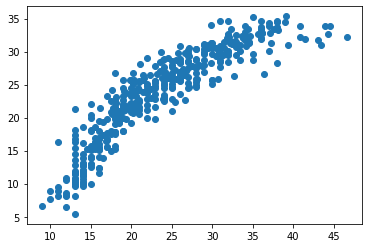

In [1273]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500


plt.scatter(y, y_predict)



In the main dataframe the predicted and actual data pionts very close to each other and the coefficient of determinnet is also good arround 80% 

## How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

In [1274]:
# Model comparision
from itertools import product
model_comparision = pd.concat([coef_0, coef_1,coef_2,coef], axis=1)
model_comparision

,coefficient0,coefficient1,coefficient2,coefficient
cyl,1.456410,-0.239880,2.644073,-0.262184
disp,-0.009367,-0.004564,-0.011959,0.007245
hp,-0.094522,-0.029585,0.012267,-0.009002
wt,-0.007086,-0.001305,-0.003256,-0.006669
acc,0.010972,-0.480253,-0.215379,0.016920
yr,0.897039,0.389787,0.367696,0.749342


cluster_0: In cluster 0 variable year of manufacturing, no. of cylinder and accelaration are most important for improving the 'mpg' so in this cluster company has to focur on other variables for improving the 'mpg

cluster_1: In cluster 1 variable only year of manufacturing is resposible for improving the 'mpg' so company has to focus other varibles for improving the 'mpg'

cluster_2: In cluster 2 No. of cylinder, year of manufacturing and horsepower are the most impportant features for driving the 'mpg'

Main Datafarame: In this main Dataset year of manufacturing, acceleration and displacement are the main features for driving the 'mpg'



## 6. Improvisation

#### Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.

Clustering is the best way to improve the 'mpg' and other features of the vehicles. By doing this we can classify the information in a propper way and increase the sales of the vehicles by improving the 'mpg' 

# PART TWO

• DOMAIN: Manufacturing 

• CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country.

• DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality.
Attribute Information: 

1. A, B, C, D: specific chemical composition measure of the wine

2. Quality: quality of wine [ Low and High ]

## 1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

## Importing the Dataset

In [1275]:
mnfc = pd.read_excel('/content/drive/MyDrive/AIML PROJECT/UNSUPERVISED/Part2 - Company.xlsx')

In [1276]:
print(mnfc.shape)
mnfc.head()

(61, 5)


,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [1277]:
# Checking the Information 
mnfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


The Dataset has 61 entries, 5 columns and some Nan values in Quality variable.

In [1278]:
# Statistical Summary
mnfc.describe()

,A,B,C,D
count,61.000000,61.000000,61.000000,61.000000
mean,118.557377,116.639344,114.081967,114.459016
std,61.771494,57.897908,65.615368,63.144431
min,3.000000,5.000000,3.000000,3.000000
25%,61.000000,63.000000,59.000000,51.000000
50%,136.000000,138.000000,135.000000,132.000000
75%,171.000000,168.000000,174.000000,174.000000
max,200.000000,200.000000,200.000000,199.000000


The mean and Standard deviation are not varying much and minimum and maximum values of each feature are also close to each other

In [1279]:
# Checking for null values
mnfc.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [1280]:
# Checking for duplicates
mnfc.duplicated().sum()

0

The dataset has no duplicate values

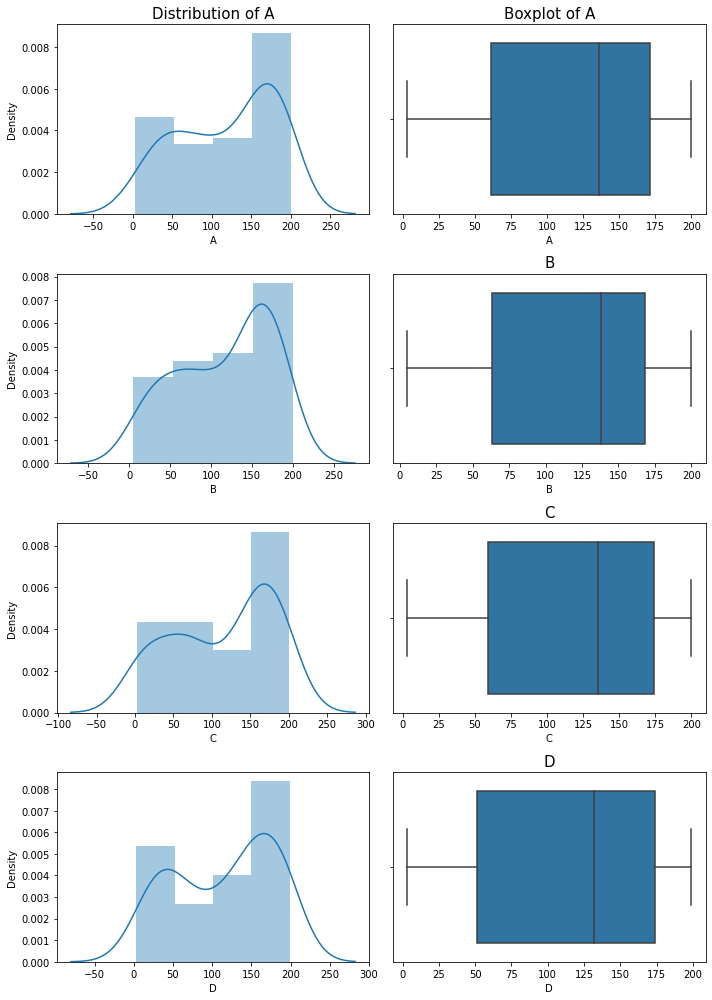

In [1281]:
# Univariate Analysis
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(10,14)
a = sns.distplot(mnfc['A'], ax = axes[0][0]);
a.set_title('Distribution of A', fontsize = 15)
a = sns.boxplot(mnfc['A'], ax = axes[0][1]);
a.set_title('Boxplot of A', fontsize = 15)

a = sns.distplot(mnfc['B'], ax = axes[1][0]);
a = sns.boxplot(mnfc['B'], ax = axes[1][1]);
a.set_title('B', fontsize = 15)

a = sns.distplot(mnfc['C'], ax = axes[2][0]);
a = sns.boxplot(mnfc['C'], ax = axes[2][1]);
a.set_title('C', fontsize = 15)

a = sns.distplot(mnfc['D'], ax = axes[3][0]);
a = sns.boxplot(mnfc['D'], ax = axes[3][1]);
a.set_title('D', fontsize = 15)
plt.tight_layout()

plt.show()

All the variables are normally distributed and there is no outliers present.

In [1282]:
# Checking the balance of the target variable
mnfc['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

### Bivariate Analysis

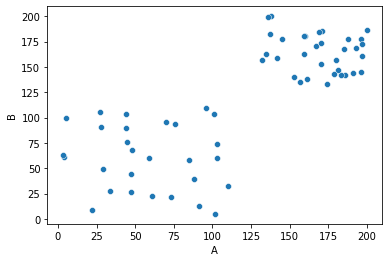

In [1283]:
sns.scatterplot(x = 'A', y = 'B', data=mnfc);

There is a slight linear relationship between variable A and B. The Data are distributed like cloud

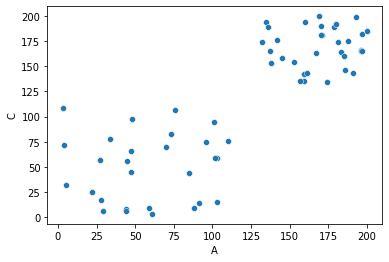

In [1284]:
sns.scatterplot(x = 'A', y = 'C', data=mnfc);

There is a slight linear relationship between variable A and C. The Data are distributed like cloud

### Multivariate Analysis

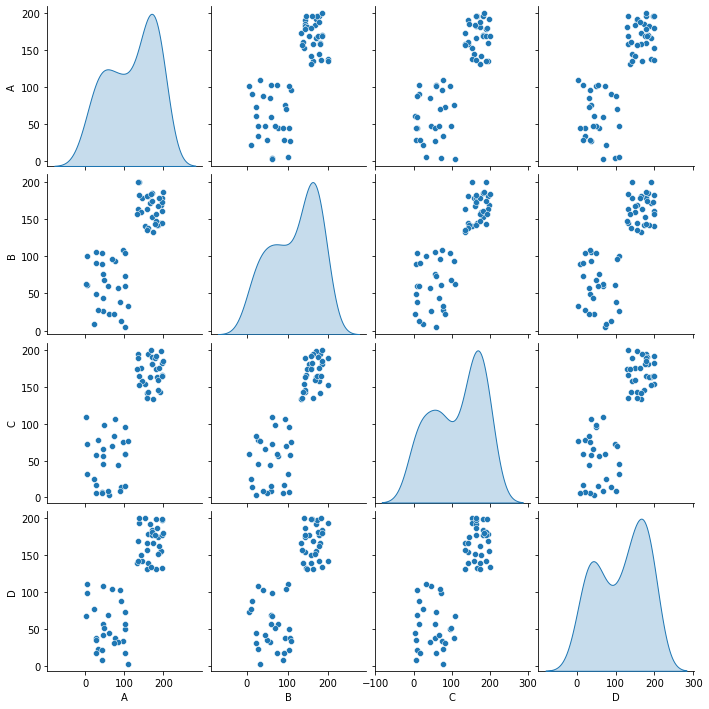

In [1285]:
sns.pairplot(mnfc, diag_kind='kde');

The above pairplot indicates that there is a moderate multi colinearity between the varibles

The density plot at diagonal indicates the atributes are slightly right skewed.

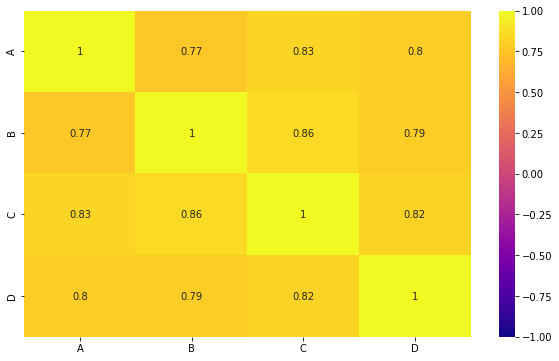

In [1286]:
# Corelation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(mnfc.iloc[:,:5].corr(), annot=True, cmap='plasma',vmax=1, vmin=-1);

The corelation heatmap shows that the variables are strongly +ve corelated

In [1287]:
# Making a copy of the dataset
mnfc1 = mnfc.copy()
mnfc1.drop('Quality', axis=1,inplace=True)
mnfc1.head()

,A,B,C,D
0,47,27,45,108
1,174,133,134,166
2,159,163,135,131
3,61,23,3,44
4,59,60,9,68


## Using KMeans clustering to generation synthetic data model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

In [1288]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
mnfc1 = mnfc1.apply(zscore)
mnfc1.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [1289]:
wcss = []
for i in range(1,5):
  kmeans = KMeans(n_clusters=i, random_state=1, max_iter=500)
  kmeans.fit(mnfc1)
  wcss.append(kmeans.inertia_)

In [1290]:
wcss

[244.00000000000006, 45.52255176619499, 38.079632514128996, 33.3761547421165]

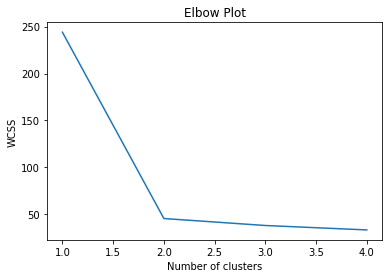

In [1291]:
# Elbow method to find optimal no of cluster
sns.lineplot(range(1,5), wcss, markers='o',);
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [1292]:
# Taking two cluster to generate the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(mnfc1)
labels = kmeans.labels_

In [1293]:
mnfc['kmeans_clus'] = labels

In [1294]:
mnfc.head()

,A,B,C,D,Quality,kmeans_clus
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1


In [1295]:
# Seperating the clusters
mnfc_0 = mnfc[mnfc['kmeans_clus'] == 0]
mnfc_0.isnull().sum()

A               0
B               0
C               0
D               0
Quality        16
kmeans_clus     0
dtype: int64

After subsetting  the cluster we can see all the null values belongs to class Quality B so imputing the null with Quality B

In [1296]:
mnfc['Quality'] = mnfc['Quality'].fillna('Quality B')
mnfc.head()

,A,B,C,D,Quality,kmeans_clus
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,Quality B,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1


In [1297]:
# Saving the dataframe to Excel sheet 
mnfc.to_excel('Manufacturing.xlsx', index=False)

# PART THREE

• DOMAIN: Automobile 

• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
The vehicle may be viewed from one of many different angles.

• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles 
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of 
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more 
difficult to distinguish between the cars.

• All the features are numeric i.e. geometric features extracted from the silhouette.

## Importing the Dataset

In [1298]:
auto = pd.read_csv('/content/drive/MyDrive/AIML PROJECT/UNSUPERVISED/Part3 - vehicle.csv')
print(auto.shape)
auto.head()

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


## 1. Data: Import, clean and pre-process the data

In [1299]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

The Dataset has 8846 entries and 19 features and some null values

In [1300]:
auto.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


The descriptive statistics of the Dataset says the mean and Standard deviation are not similler i.e Data is not scaled

In [1301]:
# Checking class of the traget variable
auto['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [1302]:
# Creating a target variable
y = auto['class']

In [1303]:
auto = auto.drop('class', axis=1)

In [1304]:
# Checking for null values
auto.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [1305]:
# Imputing the null values
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='mean')
auto = pd.DataFrame(SI.fit_transform(auto), columns=auto.columns)
auto.isnull().sum().any()

False

In [1306]:
auto.duplicated().sum()

0

In [1307]:
# Checking for noise in the Data
# Check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.
auto[ ~ auto.applymap(np.isreal).all(1)]


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio


Now, It is confirmed that there is no noise in the Dataset or no currupted value.

# 2. EDA and visualisation

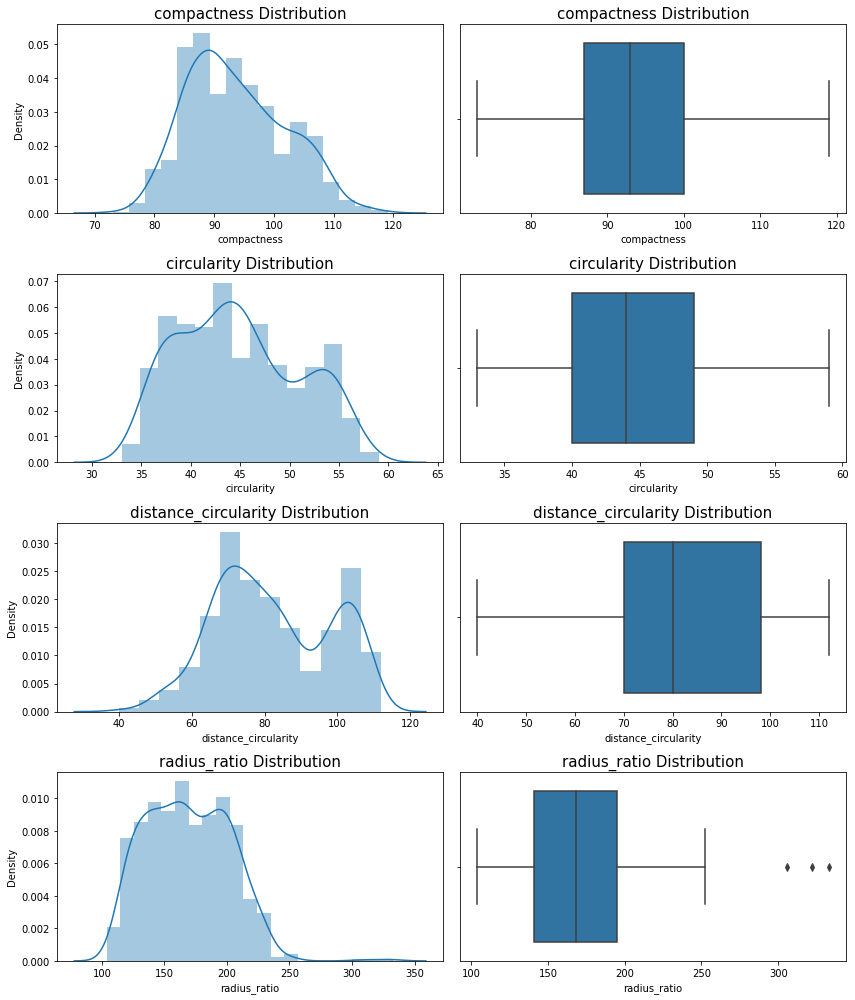

In [1308]:
## Univariate except class column
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(auto['compactness'] , ax=axes[0][0])
a.set_title("compactness Distribution",fontsize=15)
a = sns.boxplot(auto['compactness'] , orient = "v" , ax=axes[0][1])
a.set_title("compactness Distribution",fontsize=15)

a = sns.distplot(auto['circularity'] , ax=axes[1][0])
a.set_title("circularity Distribution",fontsize=15)

a = sns.boxplot(auto['circularity'] , orient = "v" , ax=axes[1][1])
a.set_title("circularity Distribution",fontsize=15)

a = sns.distplot(auto['distance_circularity'] , ax=axes[2][0])
a.set_title("distance_circularity Distribution",fontsize=15)

a = sns.boxplot(auto['distance_circularity'] , orient = "v" , ax=axes[2][1])
a.set_title("distance_circularity Distribution",fontsize=15)


a = sns.distplot(auto['radius_ratio'] , ax=axes[3][0])
a.set_title("radius_ratio Distribution",fontsize=15)

a = sns.boxplot(auto['radius_ratio'] , orient = "v" , ax=axes[3][1])
a.set_title("radius_ratio Distribution",fontsize=15)

plt.tight_layout()
plt.show()

'compactness': variable is slightly right skewed and no outliers

'circularity': Normally distributed and no outliers

'distance_circularity': Normally distributed and no outliers

'radius_ratio': Normally distributed and some upper outliers 

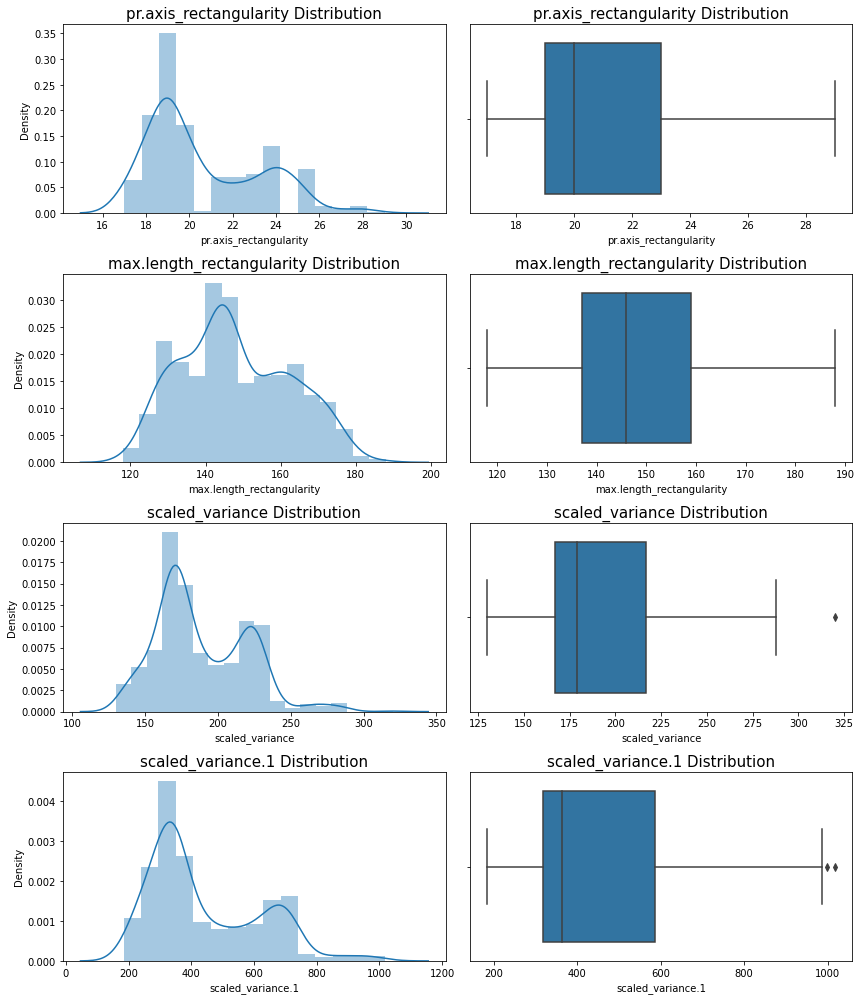

In [1309]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(auto['pr.axis_rectangularity'] , ax=axes[0][0])
a.set_title("pr.axis_rectangularity Distribution",fontsize=15)
a = sns.boxplot(auto['pr.axis_rectangularity'] , orient = "v" , ax=axes[0][1])
a.set_title("pr.axis_rectangularity Distribution",fontsize=15)

a = sns.distplot(auto['max.length_rectangularity'] , ax=axes[1][0])
a.set_title("max.length_rectangularity Distribution",fontsize=15)

a = sns.boxplot(auto['max.length_rectangularity'] , orient = "v" , ax=axes[1][1])
a.set_title("max.length_rectangularity Distribution",fontsize=15)

a = sns.distplot(auto['scaled_variance'] , ax=axes[2][0])
a.set_title("scaled_variance Distribution",fontsize=15)

a = sns.boxplot(auto['scaled_variance'] , orient = "v" , ax=axes[2][1])
a.set_title("scaled_variance Distribution",fontsize=15)


a = sns.distplot(auto['scaled_variance.1'] , ax=axes[3][0])
a.set_title("scaled_variance.1 Distribution",fontsize=15)

a = sns.boxplot(auto['scaled_variance.1'] , orient = "v" , ax=axes[3][1])
a.set_title("scaled_variance.1 Distribution",fontsize=15)

plt.tight_layout()
plt.show()

'pr.axis_rectangularity': variable is slightly right skewed and no outliers

'max.length_rectangularity': Normally distributed and no outliers

'scaled_variance': variable is slightly right skewed and some outliers

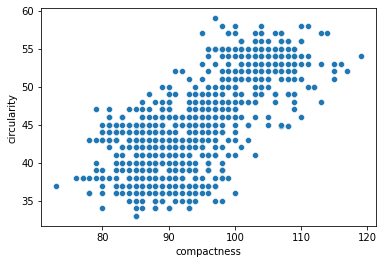

In [1310]:
# Bivariate Analysis
sns.scatterplot(x = 'compactness', y = 'circularity', data=auto);

compactness and circularity have linear relationship between them

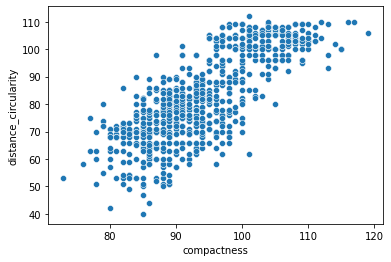

In [1311]:
# Bivariate Analysis
sns.scatterplot(x = 'compactness', y = 'distance_circularity', data=auto);

Also ther is string +ve linear relation between the variables

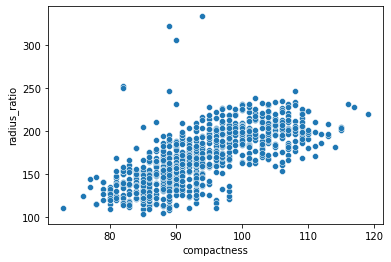

In [1312]:
# Bivariate Analysis
sns.scatterplot(x = 'compactness', y = 'radius_ratio', data=auto);

As the compactness is increases the radius_ratio also increases i.e strong linear realationship between them

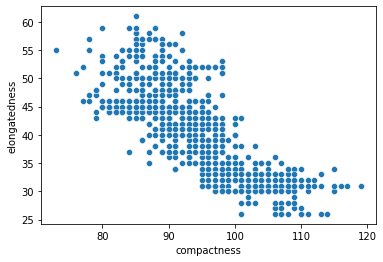

In [1313]:
# Bivariate Analysis
sns.scatterplot(x = 'compactness', y = 'elongatedness', data=auto);

There is strong -ve corelation between the variables i.e if compactness is increasing the elongatedness is decreasing

In [1314]:
# Multivariate Analysis
#sns.pairplot(auto, diag_kind='kde');

The above pairplot indicates that there is multi-colinearity in the dataset i.e some features are strongly +vely corelated and -vely corelated with each other 

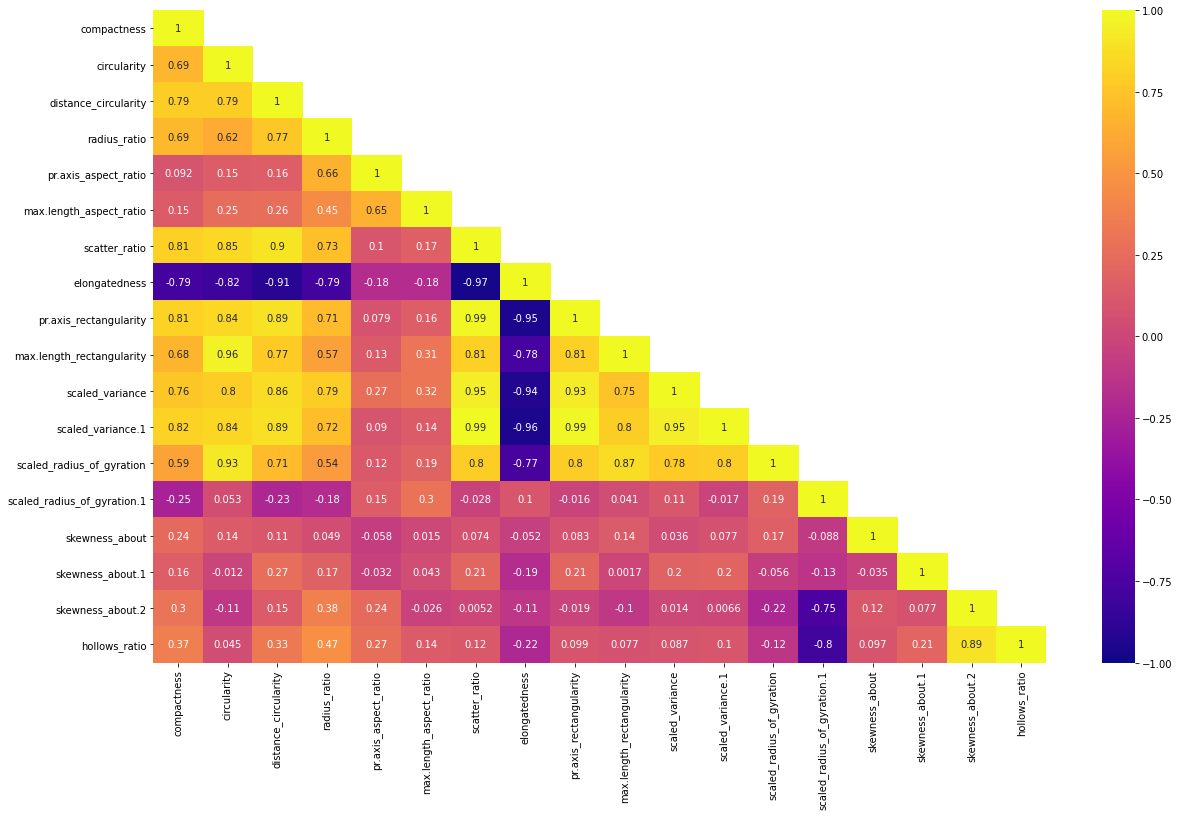

In [1315]:
# Corelation Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(auto.corr(), annot=True, vmax=1, vmin=-1, cmap='plasma', mask=np.triu(auto.corr(),+1) );

The co-relation heatmap also indicates that there is a strong multi-colinearity in the dataset. The features colored with light yellow and orange color indicates that strong +ve corelation and clored with light blue and blue color indicates strong -ve corelation. 

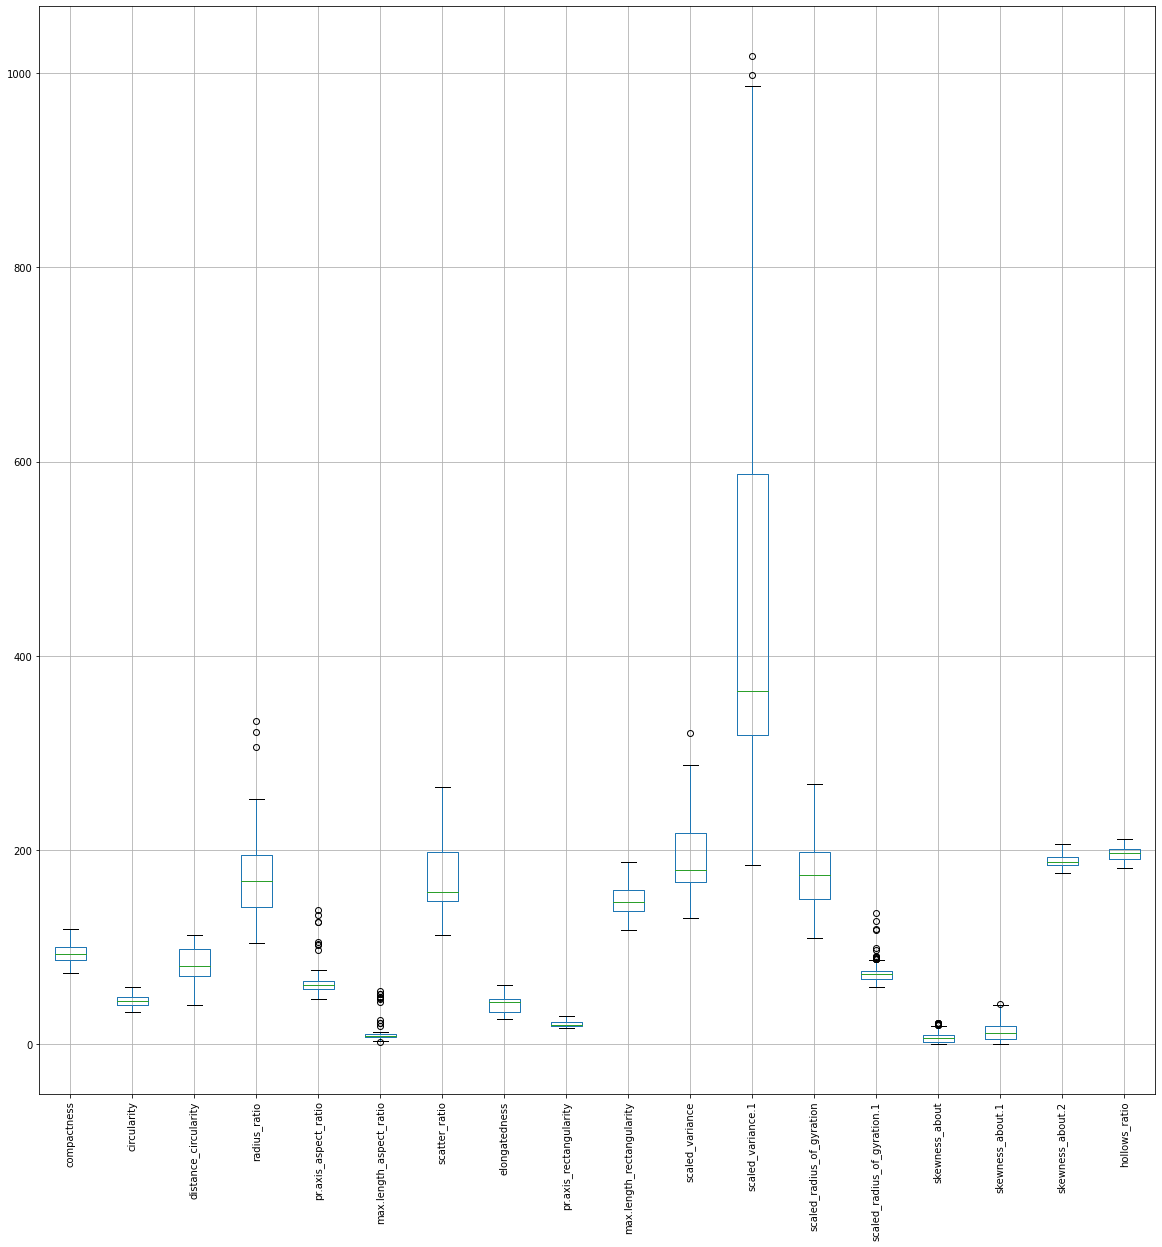

In [1316]:
# Checking for outliers
auto.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [1317]:
auto.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [1318]:
ol_col = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']

The above boxplot shows variable radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about and skewness_about.1 have some upper outliers 

variable max.length_aspect_ratio has some lower outliers.

In [1319]:
def out_limit(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range, upper_range

In [1320]:
for col in ol_col:
  lr, ur = out_limit(auto[col])
  auto[col] = np.where(auto[col] < lr, lr, auto[col])
  auto[col] = np.where(auto[col] > ur, ur, auto[col])

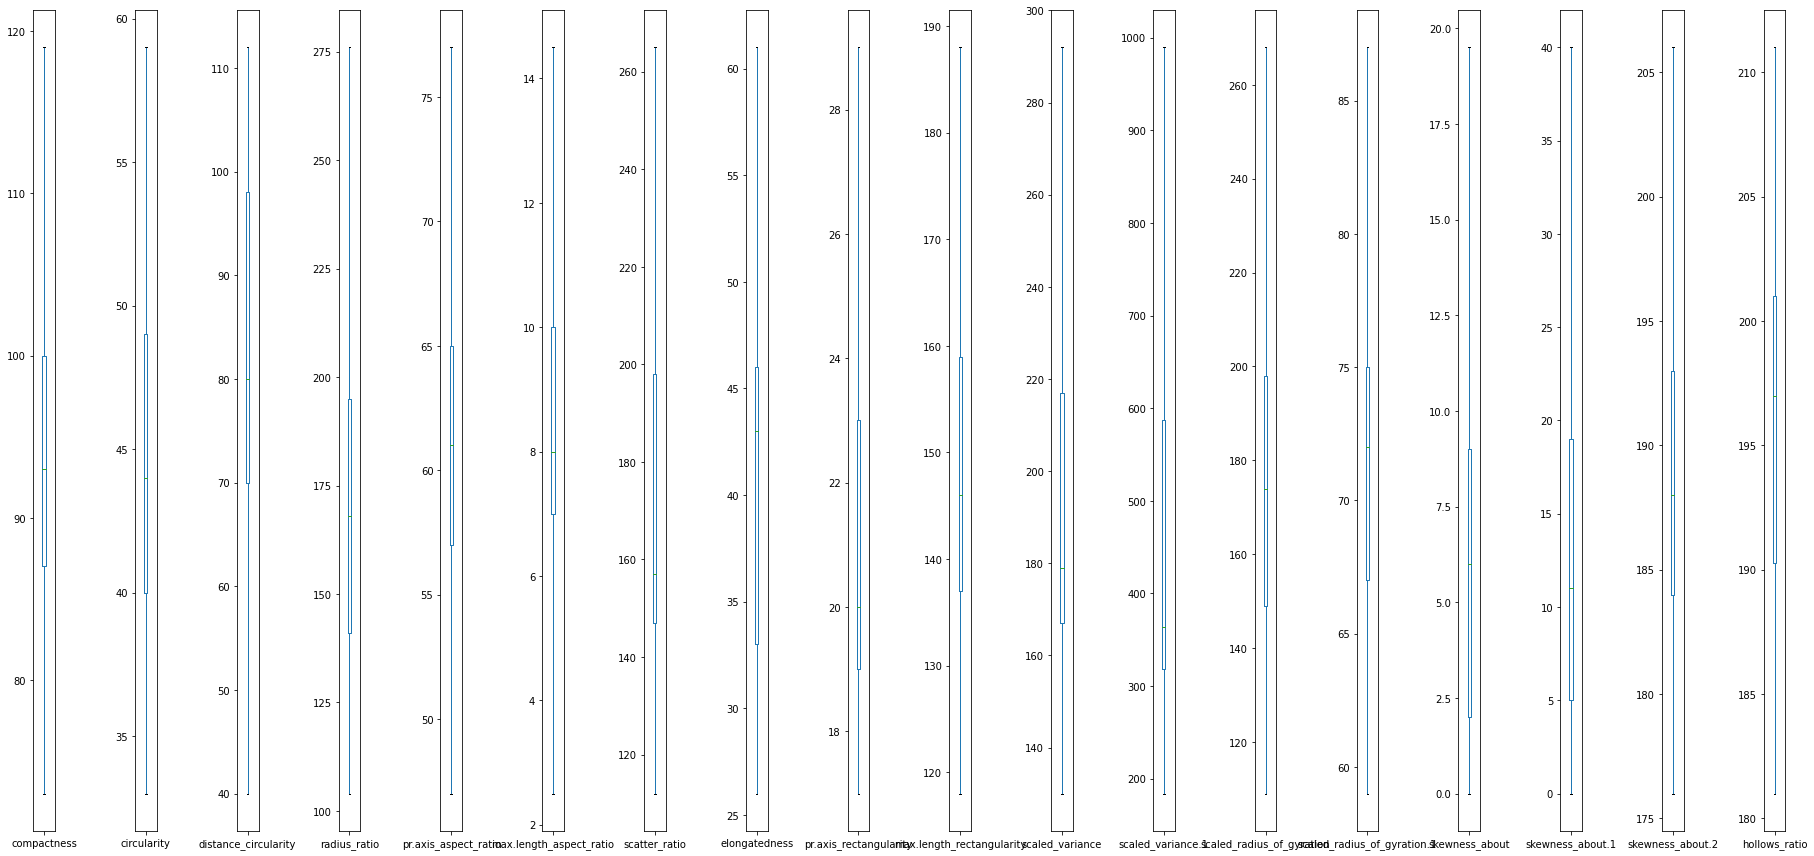

In [1321]:
#  Outliers removed by using IQR method
auto.plot(kind='box', subplots=True, figsize = (25,12))
plt.tight_layout()
plt.show()

Now, the outliers have been removed by IQR method

In [1322]:
# Creating the Independent and Dependent variable
X = auto.copy()

In [1323]:
# from sklearn.preprocessing import StandardScaler
# # scaler = StandardScaler()

In [1324]:
from scipy.stats import zscore
X = X.apply(zscore)
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.282943,1.838448,0.814478,-0.208038,0.136580,-0.225160,0.758332,-0.403621,-0.343051,0.285618,-0.343759,-0.070697,0.380955,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.846494,-0.740684,0.361007,-0.599893,0.520853,-0.611739,-0.344578,-0.595852,-0.621122,-0.513719,-0.034506,0.549766,0.156786,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.229227,0.806795,0.814478,1.148382,-1.144331,0.934576,0.689401,1.102190,1.109729,1.392391,0.120120,1.583871,-0.403638,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.297038,0.290969,0.361007,-0.750606,0.648945,-0.611739,-0.344578,-0.916237,-0.740295,-1.466773,-1.426144,-0.070697,-0.291553,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.107126,2.698158,2.855095,-0.599893,0.520853,-0.611739,-0.275646,1.678883,-0.649496,0.408593,2.284890,0.549766,-0.179468,-1.450677,-1.699181


In [1325]:
from sklearn.model_selection import train_test_split

In [1326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=1)

In [1327]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(676, 18)
(676,)
(170, 18)
(170,)


In [1328]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
model = SVC(gamma=0.025, C=3)
model.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1329]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9807692307692307
0.9764705882352941


In [1330]:
ytest_predict = model.predict(X_test)

In [1331]:
np.savetxt('predicted.csv', ytest_predict, fmt='%s')

In [1332]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

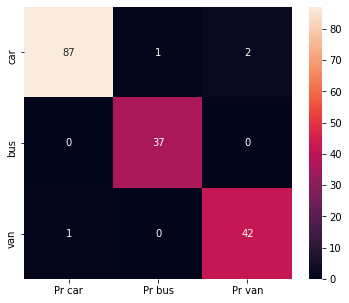

In [1333]:
from sklearn import metrics
cm = confusion_matrix(y_test, ytest_predict, labels=['car','bus','van'])
df_cm = pd.DataFrame(cm, columns= ["Pr "+s for s in ['car','bus','van']], index= ['car','bus','van'])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g');

The model has predicted 87 entries as car, 37 as Bus and 42 as Van

The model has wrongly predicted 1 car as bus and 2 car as Van. Also 1Van as car

Overall the model has performed very well on both the training as well as testing.

In [1334]:
# Classification report
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         bus       0.97      1.00      0.99        37
         car       0.99      0.97      0.98        90
         van       0.95      0.98      0.97        43

    accuracy                           0.98       170
   macro avg       0.97      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



The precision and recall for all the classes are also giving a good score as we can see from above classification report

# 4. Dimensional reduction: perform dimensional reduction on the data

In [1335]:
print(X.shape)
X.head()

(846, 18)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.282943,1.838448,0.814478,-0.208038,0.136580,-0.225160,0.758332,-0.403621,-0.343051,0.285618,-0.343759,-0.070697,0.380955,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.846494,-0.740684,0.361007,-0.599893,0.520853,-0.611739,-0.344578,-0.595852,-0.621122,-0.513719,-0.034506,0.549766,0.156786,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.229227,0.806795,0.814478,1.148382,-1.144331,0.934576,0.689401,1.102190,1.109729,1.392391,0.120120,1.583871,-0.403638,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.297038,0.290969,0.361007,-0.750606,0.648945,-0.611739,-0.344578,-0.916237,-0.740295,-1.466773,-1.426144,-0.070697,-0.291553,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.107126,2.698158,2.855095,-0.599893,0.520853,-0.611739,-0.275646,1.678883,-0.649496,0.408593,2.284890,0.549766,-0.179468,-1.450677,-1.699181


### Creating a covariance matrix for identifying Principal components

In [1336]:
# Creating covariance matrix
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)
# print(cov_matrix)

Covariance Matrix 
%s [[ 1.00118343e+00  6.86232515e-01  7.90844121e-01  7.05108179e-01
   1.67331216e-01  4.37849002e-01  8.13196231e-01 -7.89575871e-01
   8.14598883e-01  6.76943342e-01  7.66670591e-01  8.16997304e-01
   5.85848651e-01 -2.64611784e-01  2.33640213e-01  1.57584889e-01
   2.98879698e-01  3.65984455e-01]
 [ 6.86232515e-01  1.00118343e+00  7.93953986e-01  6.31618520e-01
   1.97587877e-01  5.24183473e-01  8.49210579e-01 -8.22873474e-01
   8.45971641e-01  9.63080942e-01  8.00563603e-01  8.39647819e-01
   9.27985236e-01  5.73793736e-02  1.44925262e-01 -1.18089804e-02
  -1.05769799e-01  4.53716437e-02]
 [ 7.90844121e-01  7.93953986e-01  1.00118343e+00  7.81817015e-01
   2.28723978e-01  6.11704335e-01  9.05470613e-01 -9.12513680e-01
   8.94185135e-01  7.75586236e-01  8.66240057e-01  8.88715661e-01
   7.06788350e-01 -2.47886962e-01  1.13376648e-01  2.65818412e-01
   1.45734974e-01  3.32488398e-01]
 [ 7.05108179e-01  6.31618520e-01  7.81817015e-01  1.00118343e+00
   6.81847368e-

In [1337]:
# Corelation Matrix
X.corr(method='pearson')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.704275,0.167133,0.437331,0.812235,-0.788643,0.813636,0.676143,0.765764,0.816032,0.585156,-0.264299,0.233364,0.157399,0.298526,0.365552
circularity,0.685421,1.000000,0.793016,0.630872,0.197354,0.523564,0.848207,-0.821901,0.844972,0.961943,0.799617,0.838655,0.926888,0.057312,0.144754,-0.011795,-0.105645,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.780893,0.228454,0.610981,0.904400,-0.911435,0.893128,0.774669,0.865216,0.887665,0.705953,-0.247594,0.113243,0.265504,0.145563,0.332095
radius_ratio,0.704275,0.630872,0.780893,1.000000,0.681041,0.497697,0.750084,-0.806188,0.724017,0.576698,0.795160,0.736574,0.545030,-0.328539,0.049211,0.177413,0.391705,0.480703
pr.axis_aspect_ratio,0.167133,0.197354,0.228454,0.681041,1.000000,0.230356,0.173206,-0.275633,0.142414,0.149840,0.240088,0.157952,0.148661,-0.246899,-0.057191,-0.027608,0.368492,0.389621
max.length_aspect_ratio,0.437331,0.523564,0.610981,0.497697,0.230356,1.000000,0.439222,-0.456686,0.435307,0.608645,0.415617,0.399956,0.374191,-0.257419,0.084332,0.129441,0.055275,0.372028
scatter_ratio,0.812235,0.848207,0.904400,0.750084,0.173206,0.439222,1.000000,-0.970723,0.989370,0.808356,0.952515,0.993858,0.799266,-0.013064,0.073836,0.213147,0.005167,0.118448
elongatedness,-0.788643,-0.821901,-0.911435,-0.806188,-0.275633,-0.456686,-0.970723,1.000000,-0.949077,-0.775519,-0.940723,-0.955355,-0.766029,0.102725,-0.051892,-0.185684,-0.114727,-0.216719
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.724017,0.142414,0.435307,0.989370,-0.949077,1.000000,0.811447,0.938936,0.989487,0.797068,0.003364,0.082397,0.214751,-0.018990,0.099191
max.length_rectangularity,0.676143,0.961943,0.774669,0.576698,0.149840,0.608645,0.808356,-0.775519,0.811447,1.000000,0.747663,0.796214,0.866425,0.043766,0.136175,0.001750,-0.104254,0.076770


 **`Covariance` indicates the direction of the linear relationship between variables. `Correlation` on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. 
 You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.**

### Identify eigenvalues and eigenvectors

In [1338]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)

In [1339]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [1340]:
# Eigen values
eigen_values = pca.explained_variance_
eigen_values

array([9.69195523e+00, 3.30466080e+00, 1.19718667e+00, 1.16938653e+00,
       8.74488069e-01, 7.42969171e-01, 3.44321226e-01, 2.20823352e-01,
       1.34278714e-01, 9.62986123e-02, 6.30943459e-02, 5.74715182e-02,
       4.10565181e-02, 3.06770673e-02, 2.15047654e-02, 1.87100381e-02,
       9.36687820e-03, 3.05227361e-03])

In [1341]:
pca.explained_variance_ratio_

array([5.37805501e-01, 1.83375254e-01, 6.64317533e-02, 6.48891266e-02,
       4.85252442e-02, 4.12272754e-02, 1.91063459e-02, 1.22534628e-02,
       7.45111069e-03, 5.34359912e-03, 3.50109813e-03, 3.18908805e-03,
       2.27822155e-03, 1.70226700e-03, 1.19329700e-03, 1.03821790e-03,
       5.19767013e-04, 1.69370318e-04])

In [1342]:
# Eigen vectors
eigen_vectors = pca.components_
eigen_vectors

array([[ 0.27252834,  0.28865258,  0.30257251,  0.26778608,  0.09597903,
         0.18368636,  0.31102921, -0.30932761,  0.30801394,  0.27934963,
         0.30154384,  0.30786368,  0.2650363 , -0.04116313,  0.04115611,
         0.0586403 ,  0.03590265,  0.08243418],
       [-0.09260509,  0.12975553, -0.05119754, -0.19470893, -0.24235401,
        -0.10242874,  0.07173803, -0.00918622,  0.08426474,  0.11890732,
         0.07321505,  0.07829616,  0.2095289 ,  0.50032682, -0.0392095 ,
        -0.09858294, -0.50753208, -0.51360772],
       [ 0.01181848, -0.20525905,  0.09129229, -0.03015799, -0.24559535,
        -0.14208314,  0.12098183, -0.08601785,  0.1242376 , -0.20474725,
         0.11925549,  0.12338359, -0.213206  ,  0.01902292, -0.39947761,
         0.74256637, -0.04582683, -0.01539934],
       [-0.20008443, -0.01162554, -0.06838425,  0.28236584,  0.61035134,
        -0.04570211, -0.0151105 , -0.0530117 , -0.03976131, -0.05638996,
         0.08486876, -0.02182627,  0.00444855,  0.157

## Cumulative Distribution of Eigenvalues

In [1343]:
total = sum(eigen_values)
var_exp = [(i/total)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained:', cum_var_exp)

Cumulative Variance Explained: [ 53.78055008  72.11807551  78.76125083  85.25016349  90.1026879
  94.22541544  96.13605004  97.36139632  98.10650739  98.6408673
  98.99097712  99.30988592  99.53770808  99.70793478  99.82726448
  99.93108627  99.98306297 100.        ]


The Cumulative Distribution of Eigenvalues helps us to take the No. of PCs. We can take 6 PCs as it is explaining 94% of the variance of the dataset

## Scree plot

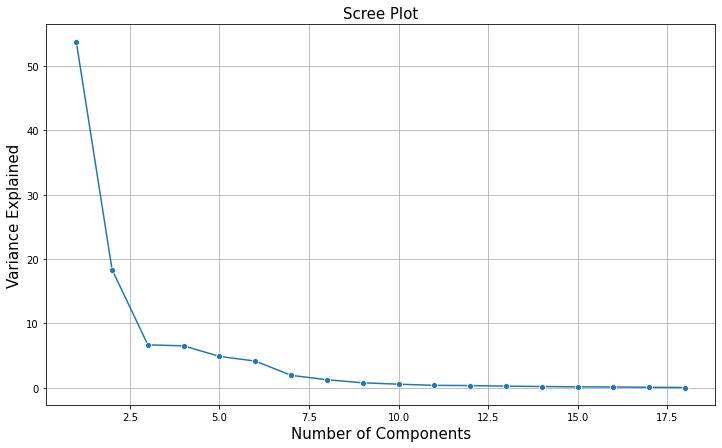

In [1344]:
plt.figure(figsize=(12,7))
sns.lineplot(x = range(1, 19), y = var_exp, marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

### Plot Cumulative explained variance and individual explained variance vs Principal Components

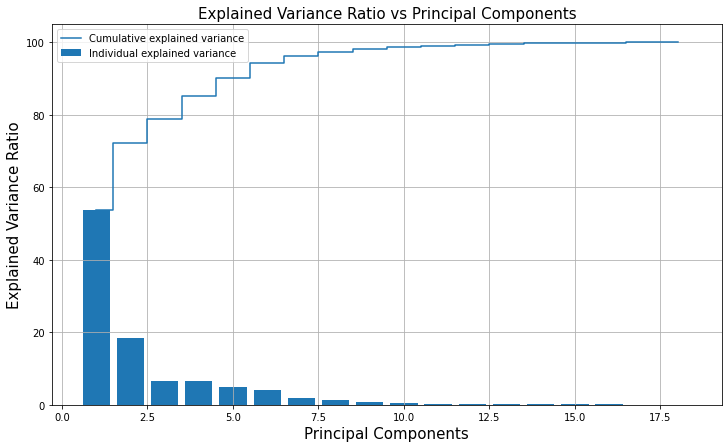

In [1345]:
plt.figure(figsize=(12,7))
plt.bar(range(1,19),var_exp,  width=0.8, label= 'Individual explained variance',)
plt.step(range(1,19),cum_var_exp,  where='mid', label= 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend()
plt.grid()
plt.show()

# Dimensionality Reduction
Now 6 dimensions seems very reasonable. With 6 variables we can explain over 95% of the variation in the original data!

In [1346]:
pca6 = PCA(n_components=6)
pca6.fit(X)
print(pca6.components_)
print('\n')
print(pca6.explained_variance_ratio_)
print('\n')
pca6 = pca6.transform(X)


[[ 0.27252834  0.28865258  0.30257251  0.26778608  0.09597903  0.18368636
   0.31102921 -0.30932761  0.30801394  0.27934963  0.30154384  0.30786368
   0.2650363  -0.04116313  0.04115611  0.0586403   0.03590265  0.08243418]
 [-0.09260509  0.12975553 -0.05119754 -0.19470893 -0.24235401 -0.10242874
   0.07173803 -0.00918622  0.08426474  0.11890732  0.07321505  0.07829616
   0.2095289   0.50032682 -0.0392095  -0.09858294 -0.50753208 -0.51360772]
 [ 0.01181848 -0.20525905  0.09129229 -0.03015799 -0.24559535 -0.14208314
   0.12098183 -0.08601785  0.1242376  -0.20474725  0.11925549  0.12338359
  -0.213206    0.01902292 -0.39947761  0.74256637 -0.04582683 -0.01539934]
 [-0.20008443 -0.01162554 -0.06838425  0.28236584  0.61035134 -0.04570211
  -0.0151105  -0.0530117  -0.03976131 -0.05638996  0.08486876 -0.02182628
   0.00444855  0.15707042 -0.65175769 -0.1674206  -0.04668686 -0.07509985]
 [ 0.16522159 -0.11514155 -0.10538062  0.10537444  0.08348336 -0.78632339
   0.11135881 -0.11732363  0.10242

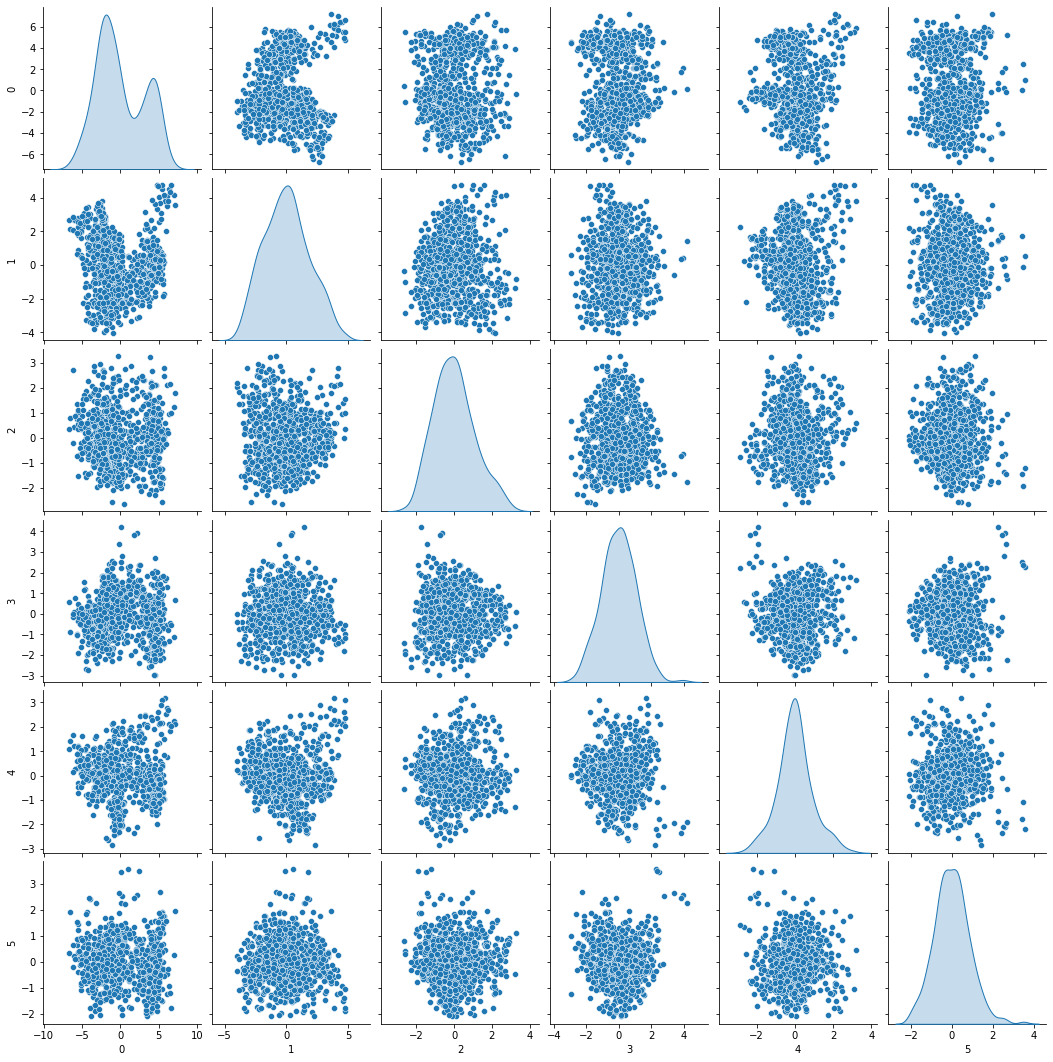

In [1347]:
# Checking the co-relation between the PCs using pairplot
sns.pairplot(pd.DataFrame(pca6), diag_kind='kde');

The above pairplot indicates that there is no multi colinearity.

# 5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes

In [1348]:
# Fitting the SVC model with reduced dimesion
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca6, y, test_size = 0.20, random_state=1, stratify=y )
from sklearn.svm import SVC
model1 = SVC(gamma=0.025, C=3)
model1.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1349]:
# Checking the accuracy 
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.9393491124260355
0.888235294117647


After PCA the model has also performed very well on both the Training and Testing Data with the accuracy of 94% and 91% respectivily

In [1350]:
ytest_predict = model1.predict(X_test)

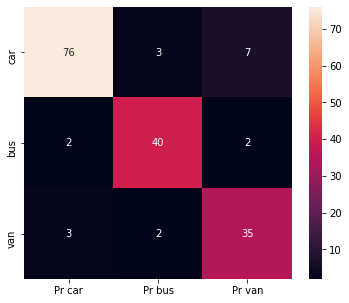

In [1351]:
from sklearn import metrics
cm = confusion_matrix(y_test, ytest_predict, labels=['car','bus','van'])
df_cm = pd.DataFrame(cm, columns= ["Pr "+s for s in ['car','bus','van']], index= ['car','bus','van'])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g');

The confusion matrix with reduced dimension is giving some error while predicting the class as compare to complete dataset

In [1352]:
# Classification report
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         bus       0.89      0.91      0.90        44
         car       0.94      0.88      0.91        86
         van       0.80      0.88      0.83        40

    accuracy                           0.89       170
   macro avg       0.87      0.89      0.88       170
weighted avg       0.89      0.89      0.89       170



The precision  and recall are also inline with the reduced dimesion as we can see in above classification report

## 6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case

Looks like by drop reducing dimensionality by 6 from 18, we only dropped around 4-5% in accuracy of the model. The PCA has performed very well on the Dataset by capturing 95% variance by 6 PCs only rather focusing on 18 PCs.

Before PCA: Score was 98% with 18 variables

After PCA : Score is 94% with 6 PCs of the 18 variables


# PART FOUR

• DOMAIN: Sports management 

• CONTEXT: Company X is a sports management company for international cricket. 

• DATA DESCRIPTION: The data is collected belongs to batsman from IPL series conducted so far. Attribute Information: 

1. Runs: Runs score by the batsman

2. Ave: Average runs scored by the batsman per match

3. SR: strike rate of the batsman

4. Fours: number of boundary/four scored

5. Six: number of boundary/six scored

6. HF: number of half centuries scored so far

In [1353]:
sports = pd.read_csv('/content/drive/MyDrive/AIML PROJECT/UNSUPERVISED/Part4 - batting_bowling_ipl_bat.csv')
print(sports.shape)
sports.head()

(180, 7)


,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods

In [1354]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


The information of the Dataset explain ther are 180 entries, 7 variables 

In [1355]:
sports.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


The descriptive statistic states that the data ia not scaled i.e mean and standard deviation are not similler

In [1356]:
# Checking for null value
sports.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [1357]:
sports.dropna(inplace=True)
sports.isnull().sum().any()

False

In [1358]:
sports.duplicated().sum()

0

In [1359]:
sports.reset_index(inplace=True, )

In [1360]:
print(sports.shape)
sports.head()

(90, 8)


,index,Name,Runs,Ave,SR,Fours,Sixes,HF
0,1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
1,3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
2,5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
3,7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
4,9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [1361]:
IPL = sports.drop({'index','Name'}, axis=1)
IPL.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,733.0,61.08,160.74,46.0,59.0,9.0
1,590.0,36.87,143.55,64.0,17.0,6.0
2,495.0,33.00,161.23,57.0,19.0,5.0
3,479.0,43.54,149.68,41.0,20.0,5.0
4,569.0,40.64,129.61,58.0,18.0,5.0


In [1362]:
IPL.shape

(90, 6)

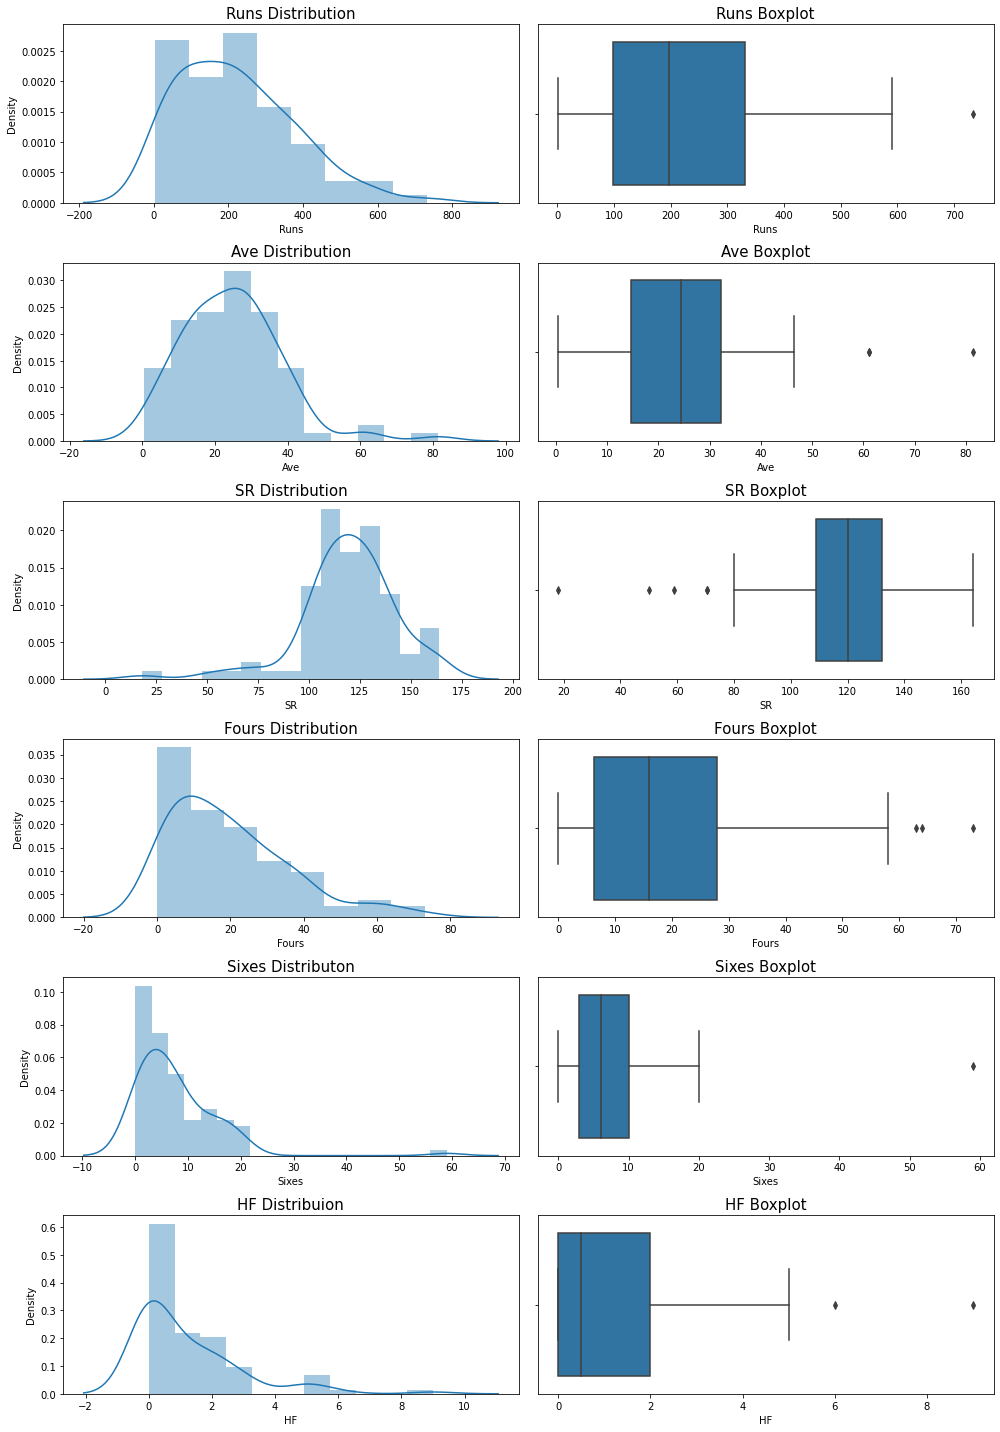

In [1363]:
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(14,20)
a = sns.distplot(IPL['Runs'], ax=axes[0][0]);
a.set_title('Runs Distribution', fontsize=15)

a = sns.boxplot(IPL['Runs'], ax=axes[0][1]);
a.set_title('Runs Boxplot', fontsize=15)

a = sns.distplot(IPL['Ave'], ax=axes[1][0]);
a.set_title('Ave Distribution', fontsize=15)


a = sns.boxplot(IPL['Ave'], ax=axes[1][1]);
a.set_title('Ave Boxplot', fontsize=15)

a = sns.distplot(IPL['SR'], ax=axes[2][0]);
a.set_title('SR Distribution', fontsize=15)

a = sns.boxplot(IPL['SR'], ax=axes[2][1]);
a.set_title('SR Boxplot', fontsize=15)

a = sns.distplot(IPL['Fours'], ax=axes[3][0]);
a.set_title('Fours Distribution', fontsize=15)

a = sns.boxplot(IPL['Fours'], ax=axes[3][1]);
a.set_title('Fours Boxplot', fontsize=15)


a = sns.distplot(IPL['Sixes'], ax=axes[4][0]);
a.set_title('Sixes Distributon', fontsize=15)

a = sns.boxplot(IPL['Sixes'], ax=axes[4][1]);
a.set_title('Sixes Boxplot', fontsize=15)

a = sns.distplot(IPL['HF'], ax=axes[5][0]);
a.set_title('HF Distribuion', fontsize=15)

a = sns.boxplot(IPL['HF'], ax=axes[5][1]);
a.set_title('HF Boxplot', fontsize=15)

plt.tight_layout()
plt.show()


'Runs': Slightly right skewed and some upper outliers

'Average': Normally distributed and some upper outliers

'Strike Rate': Slightly left skewed and some lower outliers

'Fours': Slightly right skewed and some upper outliers

'Sixes': Slightly right skewed and some upper outliers

'Half Century': Slightly right skewed and some upper outliers

## Bivariate Analysis

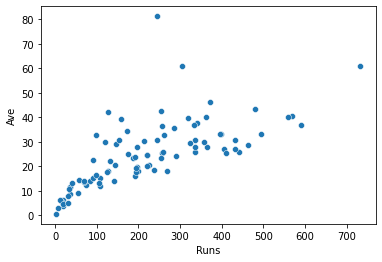

In [1364]:
sns.scatterplot('Runs', 'Ave', data=IPL);

Runs and Average have strong +ve linear relationship between them 

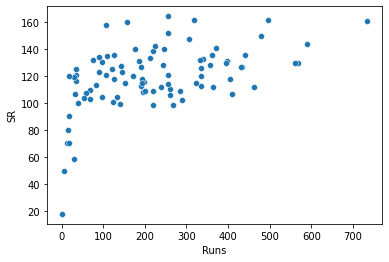

In [1365]:
sns.scatterplot('Runs', 'SR', data=IPL);

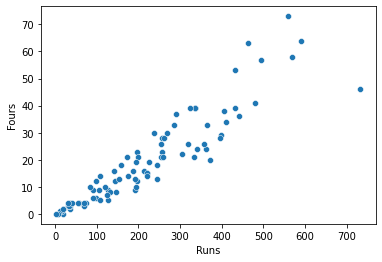

In [1366]:
sns.scatterplot('Runs', 'Fours', data=IPL);

Strong +ve corelation between the variables. The player who scores more runs has also scored more no. of Fours

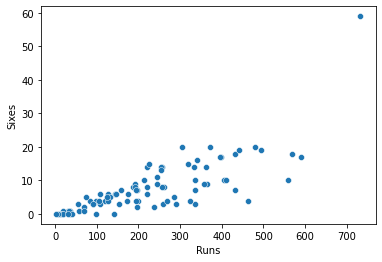

In [1367]:
sns.scatterplot('Runs', 'Sixes', data=IPL);

Positive linear corelation between the variables. As the no. of runs are increasing the no. of sixes are aslo increasing

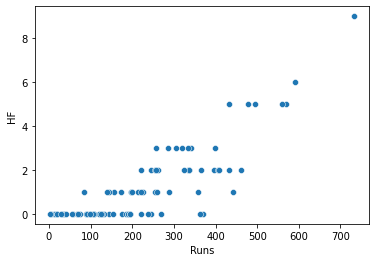

In [1368]:
sns.scatterplot('Runs', 'HF', data=IPL);

More runs indicates more half centuries

## Multivariate Analysis

In [1369]:
# sns.pairplot(IPL, diag_kind='kde');

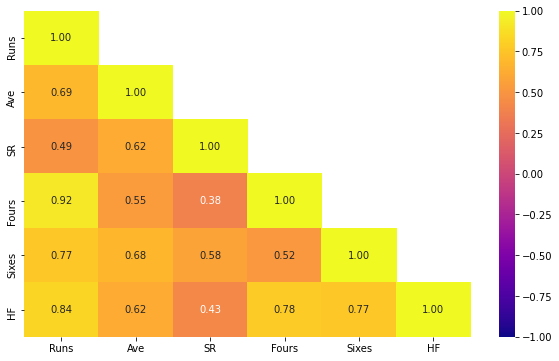

In [1370]:
# Corelation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(IPL.corr(), annot=True, fmt='.2f', vmax=1, vmin=-1, cmap = 'plasma',mask=np.triu(IPL.corr(),+1));

The corelation heatmap indicates that there is a strong +ve multi colinearity in the dataset so PCA will be a better choice to remove the multi colinearity of the dataset. 

# Checking for the outliers

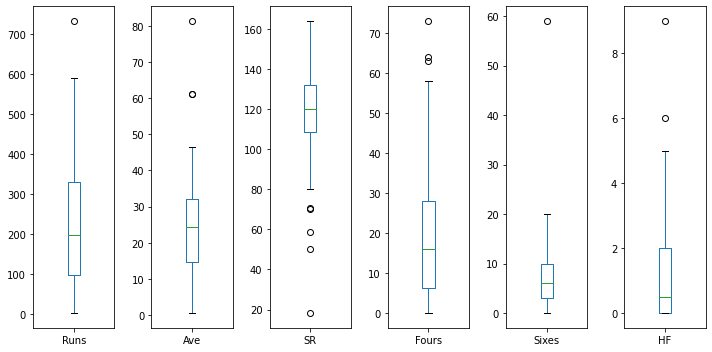

In [1371]:
IPL.plot(kind= 'box', subplots=True, figsize= (10,5))
plt.tight_layout()
plt.show()

All the variables shown above in boxplot have some upper and lower outliers

In [1372]:
# Imputing the outliers by using IQR methods
def out_limit(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range, upper_range

In [1373]:
for col in IPL.columns:
  lr, ur = out_limit(IPL[col])
  IPL[col] = np.where(IPL[col] < lr, lr, IPL[col])
  IPL[col] = np.where(IPL[col] > ur, ur, IPL[col])

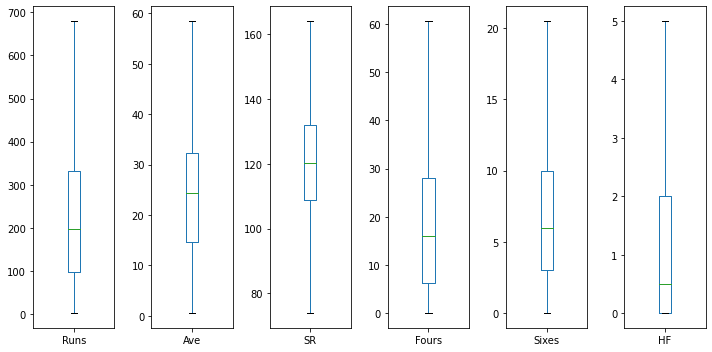

In [1374]:
IPL.plot(kind= 'box', subplots=True, figsize= (10,5))
plt.tight_layout()
plt.show()

Now the ouliers are removed using IQR method

In [1375]:
# Applying zscore for Normalzing the Dataset
from scipy.stats import zscore
IPL = IPL.apply(zscore)
IPL.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,2.999763,2.724131,2.006144,1.678593,2.237387,2.604277
1,2.414345,0.995492,1.153583,2.608055,1.650806,2.604277
2,1.795545,0.686063,2.030446,2.377675,1.985995,2.604277
3,1.691325,1.528795,1.457608,1.360828,2.153589,2.604277
4,2.277558,1.296924,0.462210,2.441228,1.818400,2.604277


In [1376]:
from sklearn.decomposition import PCA

In [1377]:
# Applying PCA on the Dataset
pca = PCA(n_components=6)
IPL_transformed = pca.fit_transform(IPL)
np.round(IPL_transformed,3)

array([[ 5.849e+00, -2.480e-01,  3.510e-01, -2.100e-02, -3.030e-01,
         7.470e-01],
       [ 4.726e+00,  1.234e+00, -7.650e-01, -9.300e-02, -8.300e-02,
         3.300e-02],
       [ 4.662e+00,  3.590e-01, -1.445e+00, -2.970e-01, -2.630e-01,
        -2.910e-01],
       [ 4.424e+00, -3.400e-02, -2.420e-01, -7.160e-01, -6.730e-01,
         4.000e-02],
       [ 4.559e+00,  1.464e+00, -9.900e-02, -3.940e-01, -1.650e-01,
        -1.150e-01],
       [ 4.010e+00,  1.889e+00, -2.770e-01,  6.410e-01, -5.690e-01,
         1.740e-01],
       [ 3.309e+00, -1.585e+00,  1.226e+00, -4.960e-01, -6.660e-01,
        -3.430e-01],
       [ 3.299e+00,  9.650e-01, -3.740e-01, -1.230e+00, -6.670e-01,
        -2.400e-02],
       [ 2.721e+00, -1.286e+00, -4.150e-01, -8.200e-02, -5.360e-01,
         3.200e-02],
       [ 1.666e+00, -1.155e+00,  1.883e+00,  2.730e-01, -9.020e-01,
         1.900e-02],
       [ 2.459e+00, -1.325e+00, -7.600e-01,  3.200e-02, -6.780e-01,
        -2.550e-01],
       [ 2.113e+00, -

In [1378]:
len(IPL_transformed)

90

The length of the transformed datset is same as IPL dataset

In [1379]:
# Converting the transformed Data into Dataframe
IPL_transformed = pd.DataFrame(IPL_transformed, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
np.round(IPL_transformed, 3).head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,5.849,-0.248,0.351,-0.021,-0.303,0.747
1,4.726,1.234,-0.765,-0.093,-0.083,0.033
2,4.662,0.359,-1.445,-0.297,-0.263,-0.291
3,4.424,-0.034,-0.242,-0.716,-0.673,0.040
4,4.559,1.464,-0.099,-0.394,-0.165,-0.115


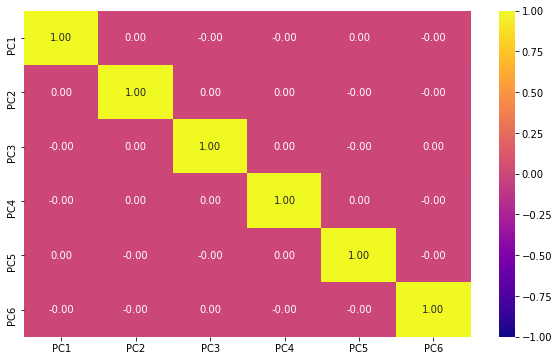

In [1380]:
plt.figure(figsize=(10,6))
sns.heatmap(IPL_transformed.corr(), annot=True, vmax=1, vmin=-1,cmap='plasma',fmt='1.2f')

The above corelation heatmap shows there is no multi colinearity in the transformed dataset

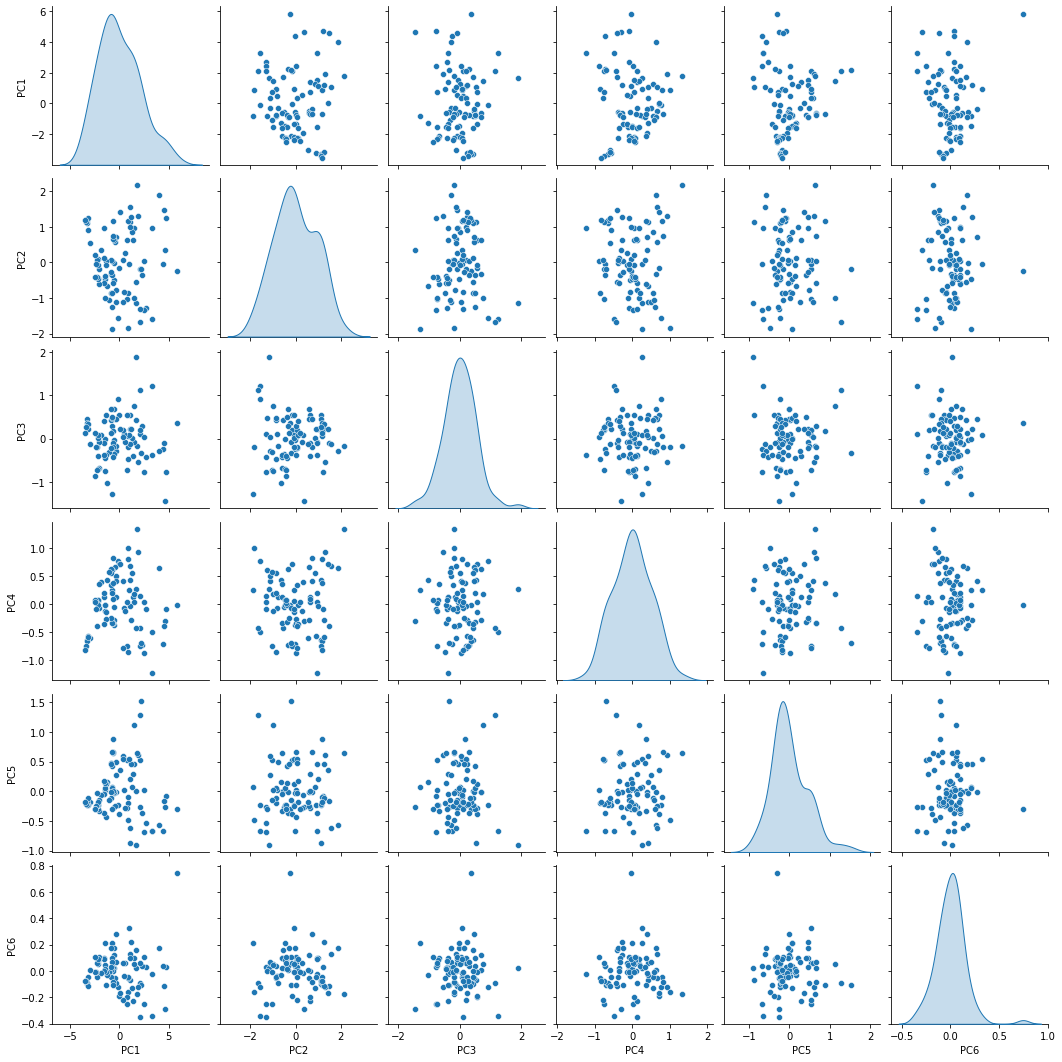

In [1381]:
sns.pairplot(IPL_transformed, diag_kind='kde');

The Data is now distributed like a cloud and no muti colinearity

In [1382]:
# Eigen vectors
eigen_vectors = np.round(pca.components_,3)
eigen_vectors

array([[ 0.449,  0.409,  0.335,  0.409,  0.422,  0.417],
       [ 0.274, -0.274, -0.682,  0.473, -0.252,  0.313],
       [ 0.044,  0.762, -0.566, -0.224,  0.08 , -0.201],
       [ 0.034,  0.349,  0.304,  0.405, -0.74 , -0.272],
       [ 0.418, -0.22 , -0.043,  0.256,  0.323, -0.778],
       [ 0.738, -0.084,  0.092, -0.574, -0.317,  0.095]])

In [1383]:
# Eigen values
eigen_values = np.round(pca.explained_variance_,3)
eigen_values

array([4.447, 0.857, 0.278, 0.258, 0.204, 0.023])

In [1384]:
len(eigen_values)

6

In [1385]:
# Variance explained by each PCs
tot =sum(eigen_values)
var_exp = [(i/tot) * 100 for i in list(eigen_values)]

In [1386]:
var_exp

[73.29817043019614,
 14.125597494643149,
 4.582165815065107,
 4.252513598153947,
 3.3624526124938185,
 0.3791000494478325]

In [1387]:
# Cumulative variance
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 73.29817043,  87.42376792,  92.00593374,  96.25844734,
        99.62089995, 100.        ])

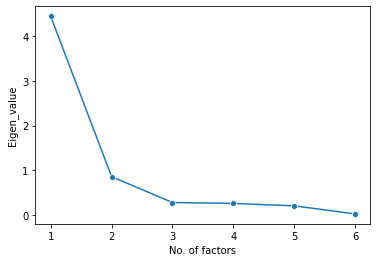

In [1388]:
# Lineplot to find the elbow
sns.lineplot(range(1,7), eigen_values, marker='o')
plt.xlabel('No. of factors')
plt.ylabel('Eigen_value')
plt.show()

The above lineplot indicates the variance explained by each PCs

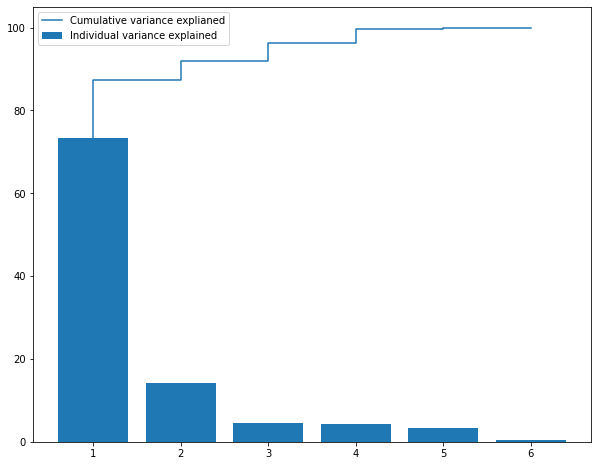

In [1389]:
plt.figure(figsize=(10,8))
plt.bar(range(1,7), var_exp, label = 'Individual variance explained')
plt.step(range(1,7), cum_var_exp, label = 'Cumulative variance explianed')
plt.legend()
plt.show()

The combined bar and step plot indicates that Individual and cumulative variance explained by each PCs

In [1390]:
IPL_transformed = np.round(IPL_transformed.iloc[:,:2],2)
IPL_transformed.head()

,PC1,PC2
0,5.85,-0.25
1,4.73,1.23
2,4.66,0.36
3,4.42,-0.03
4,4.56,1.46


In [1391]:
IPL_transformed.insert(loc=0, column='players', value=sports['Name'])

In [1392]:
IPL_transformed.head()

,players,PC1,PC2
0,CH Gayle,5.85,-0.25
1,G Gambhir,4.73,1.23
2,V Sehwag,4.66,0.36
3,CL White,4.42,-0.03
4,S Dhawan,4.56,1.46


In [1393]:
IPL_transformed = IPL_transformed.drop('PC2', axis=1)

In [1394]:
batsman_ranking = IPL_transformed.sort_values('PC1', ascending=False)
pd.options.display.max_rows = 200
batsman_ranking

,players,PC1
0,CH Gayle,5.85
1,G Gambhir,4.73
2,V Sehwag,4.66
4,S Dhawan,4.56
3,CL White,4.42
5,AM Rahane,4.01
6,KP Pietersen,3.31
7,RG Sharma,3.30
8,AB de Villiers,2.72
10,DA Warner,2.46


# Conclusion:

**1) We have developed as required a single composite score for each batsman which captures most of the details of the 6 evaluation parameters(Runs,Average,Strike Rate, 4s, 6s, 50s/100s) into a single score.**

**2) We have sorted the batsmen in decreasing order from highest composite score to the lowest.**

**3) IPL franchise selectors/management can use this sorted list to target the batsman they want to buy and develop better bidding strategies or amount from their budget they would pay to buy a particular batsman or set of batsman.**

# PART FIVE

## 1. List down all possible dimensionality reduction techniques that can be implemented using python.

There are two types of dimentionality reduction techniques which is as follows:

1. Components/ Factor Based:-

  * Factor Analysis: This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor

  * Principal Component Analysis: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible

  * Independent Component Analysis: We can use ICA to transform the data into independent components which describe the data using less number of components

2. Projection Based:-

  * ISOMAP: We use this technique when the data is strongly non-linear

  * t-SNE: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well

  * UMAP: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE

## Q2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

The image is a combination of pixels in rows placed one after another to form one single image each pixel value represents the intensity value of the image, so if we have multiple images we can form a matrix considering a row of pixels as a vector. It requires huge amounts of storage while working with many images where we are using PCA is used to compress it and preserve the data as much as possible.


This method extracts the features of video frames and process them adaptively based on required accuracy. This idea improves the quality of compression effectively. Most of other video compression methods use DCT transform to compression.

In [1395]:
# # Converting ipynb to html
# ! jupyter nbconvert --to html Project - Unsupervised Learning_AjayKumar.ipynb